In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from scipy import integrate
from scipy.optimize import curve_fit

In [ ]:
! gdown --id 1hpLgeURe0gdBqEAlqsIH7ZSsIzkuMcAH

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1hpLgeURe0gdBqEAlqsIH7ZSsIzkuMcAH
To: /content/piggy_merged_nitrate_data.20230815163319.csv.gz
100% 18.4M/18.4M [00:00<00:00, 177MB/s]


In [ ]:
!gunzip -c /content/piggy_merged_nitrate_data.20230815163319.csv.gz > /content/piggy_merged_nitrate_data.20230815163319.csv

In [ ]:
df = pd.read_csv('/content/piggy_merged_nitrate_data.20230815163319.csv', sep='\t')

<ipython-input-4-316af805b826>:1: DtypeWarning: Columns (90) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/piggy_merged_nitrate_data.20230815163319.csv', sep='\t')


In [ ]:
df.tail()

DateTime  Cathode #1  Current #1  Anode #1  Total V #1  \
2072567  2023/08/15 10:36:31      -0.425         0.0    -0.467       0.042   
2072568  2023/08/15 10:36:47      -0.425         0.0    -0.467       0.042   
2072569  2023/08/15 10:36:51      -0.425         0.0    -0.467       0.042   
2072570  2023/08/15 10:37:05      -0.425         0.0    -0.467       0.042   
2072571  2023/08/15 10:37:11      -0.425         0.0    -0.467       0.042   

         Temp anode #1  Cathode #2  Current #2  Anode #2  Total V #2  ...  \
2072567           28.4      -0.401      -0.185     0.065      -0.466  ...   
2072568           28.3      -0.401      -0.185     0.065      -0.466  ...   
2072569           28.3      -0.401      -0.185     0.065      -0.466  ...   
2072570           28.3      -0.401      -0.185     0.065      -0.466  ...   
2072571           28.3      -0.401      -0.185     0.065      -0.466  ...   

         COD removal concentration #2-out  COD removal percentage #1-out  \
2072567                               NaN                            NaN   
2072568                               NaN                            NaN   
2072569                               NaN                            NaN   
2072570                               NaN                            NaN   
2072571                               NaN                            NaN   

         COD removal percentage #2-out  NO3 removal concentration #1-out  \
2072567                            NaN                               NaN   
2072568                            NaN                               NaN   
2072569                            NaN                               NaN   
2072570                            NaN                               NaN   
2072571                            NaN                               NaN   

         NO3 removal concentration #2-out  NO3 removal percentage #1-out  \
2072567                               NaN                            NaN   
2072568                               NaN                            NaN   
2072569                               NaN                            NaN   
2072570                               NaN                            NaN   
2072571                               NaN                            NaN   

         NO3 removal percentage #2-out  NO3 removal amount #1-out  \
2072567                            NaN                        NaN   
2072568                            NaN                        NaN   
2072569                            NaN                        NaN   
2072570                            NaN                        NaN   
2072571                            NaN                        NaN   

         NO3 removal amount #2-out  Average temperature  
2072567                        NaN                  NaN  
2072568                        NaN                  NaN  
2072569                        NaN                  NaN  
2072570                        NaN                  NaN  
2072571                        NaN                  NaN  

[5 rows x 102 columns]

In [ ]:
# Вывод информации о каждом столбце
for col, count in df.count().iteritems():
    if count == 0:
      print(f"{col}: {count} непустых значений")

<ipython-input-10-5bc84e6a44db>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, count in df.count().iteritems():


In [ ]:
df['DateTime'][df['DateTime'].astype(str).str.contains('[a-zA-Z]')]

Series([], Name: DateTime, dtype: object)

In [ ]:
['CODMn(a) Anode Tank',
'CODMn(a) #1-out',
'CODMn(a) #2-out',
'CODcr(c) #1-M-out',
'CODcr(c) #2-M-out']

In [ ]:
df = df.drop(463356)

In [ ]:
df = df.drop(['CODMn(a) Anode Tank',
'CODMn(a) #1-out',
'CODMn(a) #2-out',
'CODcr(c) #1-M-out',
'CODcr(c) #2-M-out'], axis=1)

In [ ]:
df['timestamp'] = pd.to_datetime(df['DateTime'], format='%Y/%m/%d %H:%M:%S')

In [ ]:
df.set_index('timestamp').resample('1s').count()

In [ ]:
df.shape

(2072572, 102)

In [ ]:
df.tail()

DateTime  Cathode #1  Current #1  Anode #1  Total V #1  \
2072567  2023/08/15 10:36:31      -0.425         0.0    -0.467       0.042   
2072568  2023/08/15 10:36:47      -0.425         0.0    -0.467       0.042   
2072569  2023/08/15 10:36:51      -0.425         0.0    -0.467       0.042   
2072570  2023/08/15 10:37:05      -0.425         0.0    -0.467       0.042   
2072571  2023/08/15 10:37:11      -0.425         0.0    -0.467       0.042   

         Temp anode #1  Cathode #2  Current #2  Anode #2  Total V #2  ...  \
2072567           28.4      -0.401      -0.185     0.065      -0.466  ...   
2072568           28.3      -0.401      -0.185     0.065      -0.466  ...   
2072569           28.3      -0.401      -0.185     0.065      -0.466  ...   
2072570           28.3      -0.401      -0.185     0.065      -0.466  ...   
2072571           28.3      -0.401      -0.185     0.065      -0.466  ...   

         COD removal percentage #1-out  COD removal percentage #2-out  \
2072567                            NaN                            NaN   
2072568                            NaN                            NaN   
2072569                            NaN                            NaN   
2072570                            NaN                            NaN   
2072571                            NaN                            NaN   

         NO3 removal concentration #1-out  NO3 removal concentration #2-out  \
2072567                               NaN                               NaN   
2072568                               NaN                               NaN   
2072569                               NaN                               NaN   
2072570                               NaN                               NaN   
2072571                               NaN                               NaN   

         NO3 removal percentage #1-out  NO3 removal percentage #2-out  \
2072567                            NaN                            NaN   
2072568                            NaN                            NaN   
2072569                            NaN                            NaN   
2072570                            NaN                            NaN   
2072571                            NaN                            NaN   

         NO3 removal amount #1-out  NO3 removal amount #2-out  \
2072567                        NaN                        NaN   
2072568                        NaN                        NaN   
2072569                        NaN                        NaN   
2072570                        NaN                        NaN   
2072571                        NaN                        NaN   

         Average temperature           timestamp  
2072567                  NaN 2023-08-15 10:36:31  
2072568                  NaN 2023-08-15 10:36:47  
2072569                  NaN 2023-08-15 10:36:51  
2072570                  NaN 2023-08-15 10:37:05  
2072571                  NaN 2023-08-15 10:37:11  

[5 rows x 103 columns]

In [ ]:
df_min = df.set_index('timestamp').resample('1T').mean()
df_5min = df.set_index('timestamp').resample('5T').mean()
df_h = df.set_index('timestamp').resample('1H').mean()

<ipython-input-9-0a8f2317f074>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_min = df.set_index('timestamp').resample('1T').mean()
<ipython-input-9-0a8f2317f074>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_5min = df.set_index('timestamp').resample('5T').mean()
<ipython-input-9-0a8f2317f074>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_h = df.set_index('timestamp').resample('1H').mean()


In [ ]:
df['DateTime'][df['CODcr(a) Anode Tank'].dropna().index]

14119      2022/08/24 13:19:38
22632      2022/08/26 13:19:49
35592      2022/08/29 13:19:49
48552      2022/09/01 13:19:49
67397      2022/09/06 13:19:41
76037      2022/09/08 13:19:41
97610      2022/09/13 13:19:34
136654     2022/09/22 14:17:31
157702     2022/10/05 13:19:44
157703     2022/10/05 13:19:44
166341     2022/10/07 13:19:39
187941     2022/10/12 13:19:44
216620     2022/10/20 10:17:34
217160     2022/10/20 13:17:34
241480     2022/10/26 12:45:32
290131     2022/11/04 13:35:33
290132     2022/11/04 13:35:33
324880     2022/11/08 13:35:39
342042     2022/11/10 13:35:30
393543     2022/11/16 13:35:30
463355     2022/11/24 13:35:34
498063     2022/11/28 13:35:44
507352     2022/11/30 13:35:40
536432     2022/12/09 13:35:33
562249     2022/12/15 12:35:33
577878     2022/12/19 11:21:32
608565     2022/12/26 11:21:36
673724     2023/01/10 13:21:34
725632     2023/01/19 11:47:46
781326     2023/01/26 13:47:31
851599     2023/02/03 13:47:31
896102     2023/02/08 14:10:31
993802  

In [ ]:
157702     2022/10/05 13:19:44
157703
290131     2022/11/04 13:35:33
290132

In [ ]:
df[157702:157702+2]

DateTime  Cathode #1  Current #1  Anode #1  Total V #1  \
157702  2022/10/05 13:19:44       -0.14         0.0     -0.19        0.05   
157703  2022/10/05 13:19:44       -0.14         0.0     -0.19        0.05   

        Temp anode #1  Cathode #2  Current #2  Anode #2  Total V #2  ...  \
157702           26.1        0.02         0.0     -0.33        0.35  ...   
157703           26.1        0.02         0.0     -0.33        0.35  ...   

        COD removal percentage #1-out  COD removal percentage #2-out  \
157702                      14.666667                      19.333333   
157703                       2.564103                      12.820513   

        NO3 removal concentration #1-out  NO3 removal concentration #2-out  \
157702                              97.9                              58.0   
157703                             -20.8                             -63.8   

        NO3 removal percentage #1-out  NO3 removal percentage #2-out  \
157702                          78.32                           46.4   
157703                            NaN                            NaN   

        NO3 removal amount #1-out  NO3 removal amount #2-out  \
157702                    33286.0                    19720.0   
157703                    -7072.0                   -21692.0   

        Average temperature           timestamp  
157702                25.80 2022-10-05 13:19:44  
157703                26.15 2022-10-05 13:19:44  

[2 rows x 103 columns]

In [ ]:
df['DateTime'][df['CODcr(a) Anode Tank'].dropna().index]

In [ ]:
df.columns.to_list()

['DateTime',
 'Cathode #1',
 'Current #1',
 'Anode #1',
 'Total V #1',
 'Temp anode #1',
 'Cathode #2',
 'Current #2',
 'Anode #2',
 'Total V #2',
 'Temp anode #2',
 'Cathode pump #1',
 'Cathode pump #2',
 'Anode pump #1',
 'Anode pump#2',
 'sludge mixing pump',
 'Temp anode storage',
 'Cath tank float',
 'Anode tank float',
 'Power',
 'NO3-N_sensor_Temp',
 'NO3-N_sensor_Storage',
 'NO3-N_sensor_C1_out',
 'NO3-N_sensor_C2_out',
 'BES1 Cathode',
 'BES1 Current',
 'BES1 Anode',
 'BES1 Total',
 'BES1 Temp',
 'BES2 Cathode',
 'BES2 Current',
 'BES2 Anode',
 'BES2 Total',
 'BES2 Temp',
 'data logger',
 'pH(a) Anode Tank',
 'pH(a) #1-out',
 'pH(a) #2-out',
 'CODcr(a) Anode Tank',
 'CODcr(a) #1-out',
 'CODcr(a) #2-out',
 'CODcr(a)cent Anode Tank',
 'CODcr(a)cent #1-out',
 'CODcr(a)cent #2-out',
 'CODMn(a) Anode Tank',
 'CODMn(a) #1-out',
 'CODMn(a) #2-out',
 'BOD(a) Anode Tank',
 'BOD(a) #1-out',
 'BOD(a) #2-out',
 'PO4(a) Anode Tank',
 'PO4(a) #1-out',
 'PO4(a) #2-out',
 'NO2-N(a) Anode Tank

In [ ]:
#define subplots
def plot_15(ds_m):
  for j in range(24):
    k1 = j
    k2 = k1 + 1
    fig,ax = plt.subplots(figsize=(22, 10))
    # Автоматическая подстройка масштаба осей
    d = 360*60
    #add first line to plot
    ax.scatter(ds_m['Current #1'][d*k1:d*k2].index, ds_m['Current #1'][d*k1:d*k2], color = 'purple', label ='Current #1')
    ax.plot(ds_m['Total V #1'][d*k1:d*k2].index, ds_m['Total V #1'][d*k1:d*k2], color = 'blue', label ='Total V #1')
    ax.plot(ds_m['Cathode #1'][d*k1:d*k2].index, ds_m['Cathode #1'][d*k1:d*k2], color = 'red', label ='Cathode #1')
    ax.plot(ds_m['Anode #1'][d*k1:d*k2].index, ds_m['Anode #1'][d*k1:d*k2], color = 'green', label ='Anode #1')
    #add x-axis label
    ax.plot(ds_m['Cath tank float'][d*k1:d*k2].index, ds_m['Cath tank float'][d*k1:d*k2], color = 'brown', label ='Cath tank float')
    ax.plot(ds_m['Anode tank float'][d*k1:d*k2].index, ds_m['Anode tank float'][d*k1:d*k2], color = 'orange', label ='Anode tank float')

    ax.set_xlabel('time', fontsize= 14 )

    #add y-axis label
    ax.set_ylabel('BES1 Amper and Volt', fontsize= 16 )

    #define second y-axis that shares x-axis with current plot
    ax2 = ax.twinx ()

    #add second line to plot
    ax2.scatter(ds_m['NO3 removal concentration #1-out'][d*k1:d*k2].index,   ds_m['NO3 removal concentration #1-out'][d*k1:d*k2], marker='o', s=40, color='orange', label ='NO3')
    ax2.scatter(ds_m['NO3-N_sensor_C1_out'][d*k1:d*k2].index,   ds_m['NO3-N_sensor_Storage'][d*k1:d*k2], marker='D', color='yellow', label ='storage NO3')
    ax2.scatter(ds_m['NO3-N_sensor_C1_out'][d*k1:d*k2].index,   ds_m['NO3-N_sensor_C1_out'][d*k1:d*k2], marker='D', color='blue', label ='NO3 cathode out')
    ax2.scatter(ds_m['NO3-N_sensor_Storage'][d*k1:d*k2].index,   ds_m['NO3-N_sensor_Storage'][d*k1:d*k2].values - ds_m['NO3-N_sensor_C1_out'][d*k1:d*k2].values, marker='D', color='black', label ='Difference storage NO3')
    #add second y-axis label
    ax2.set_ylabel('NO3 removal concentration #1-out')
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='best')

<ipython-input-31-a5e3a009dccc>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = plt.subplots(figsize=(22, 10))


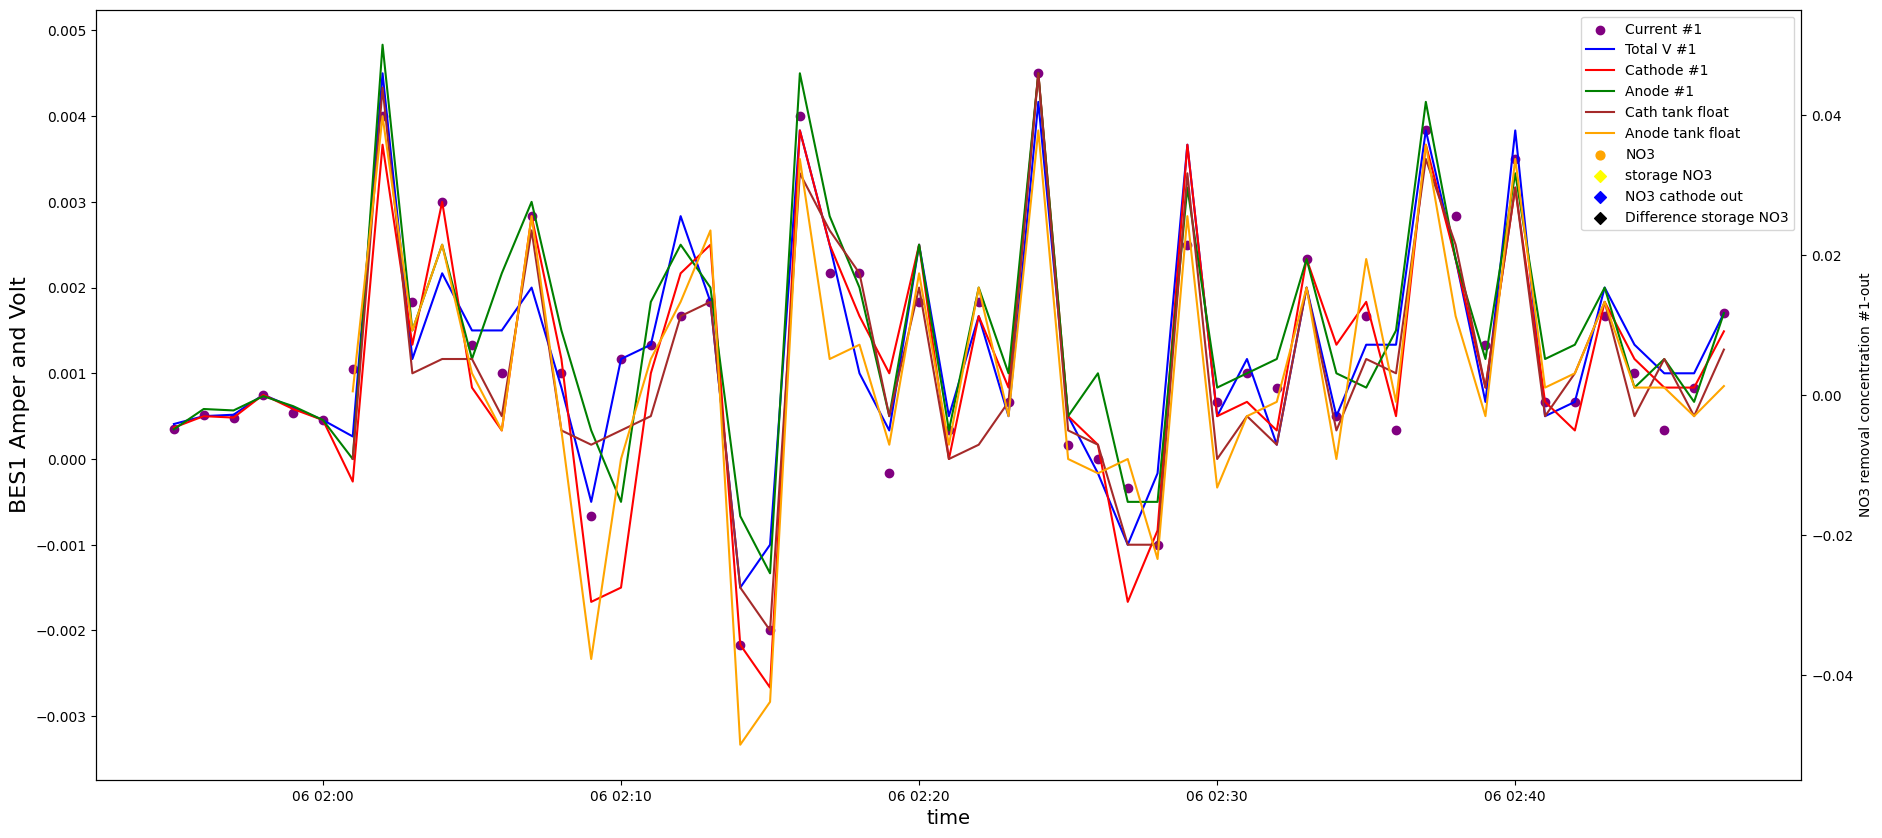

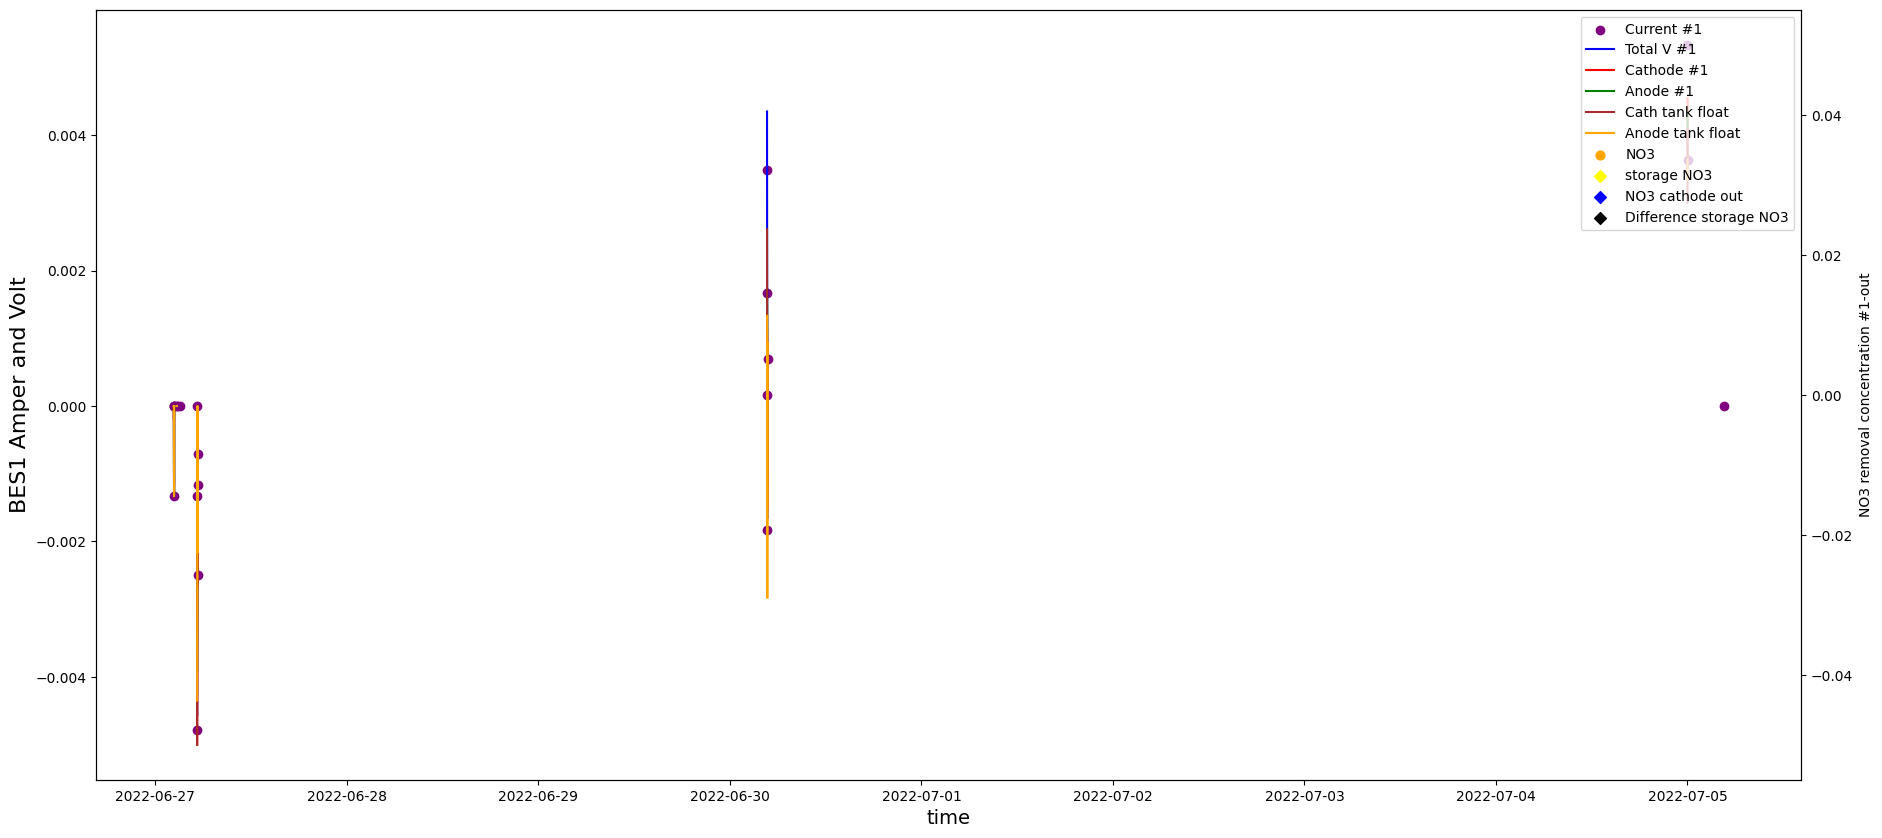

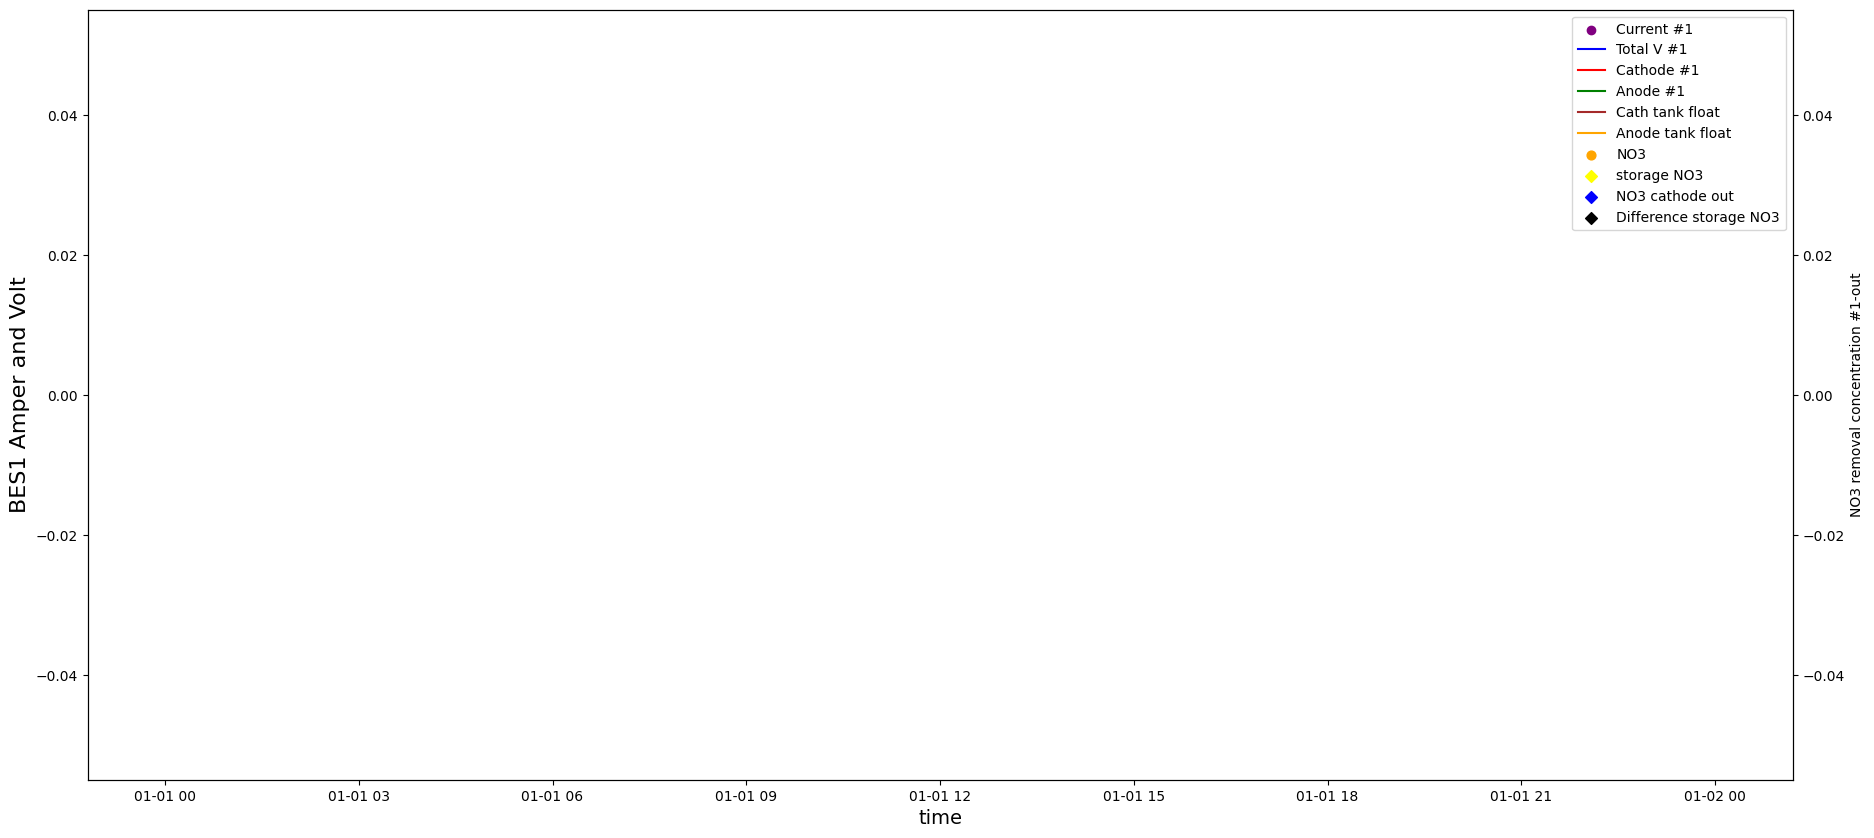

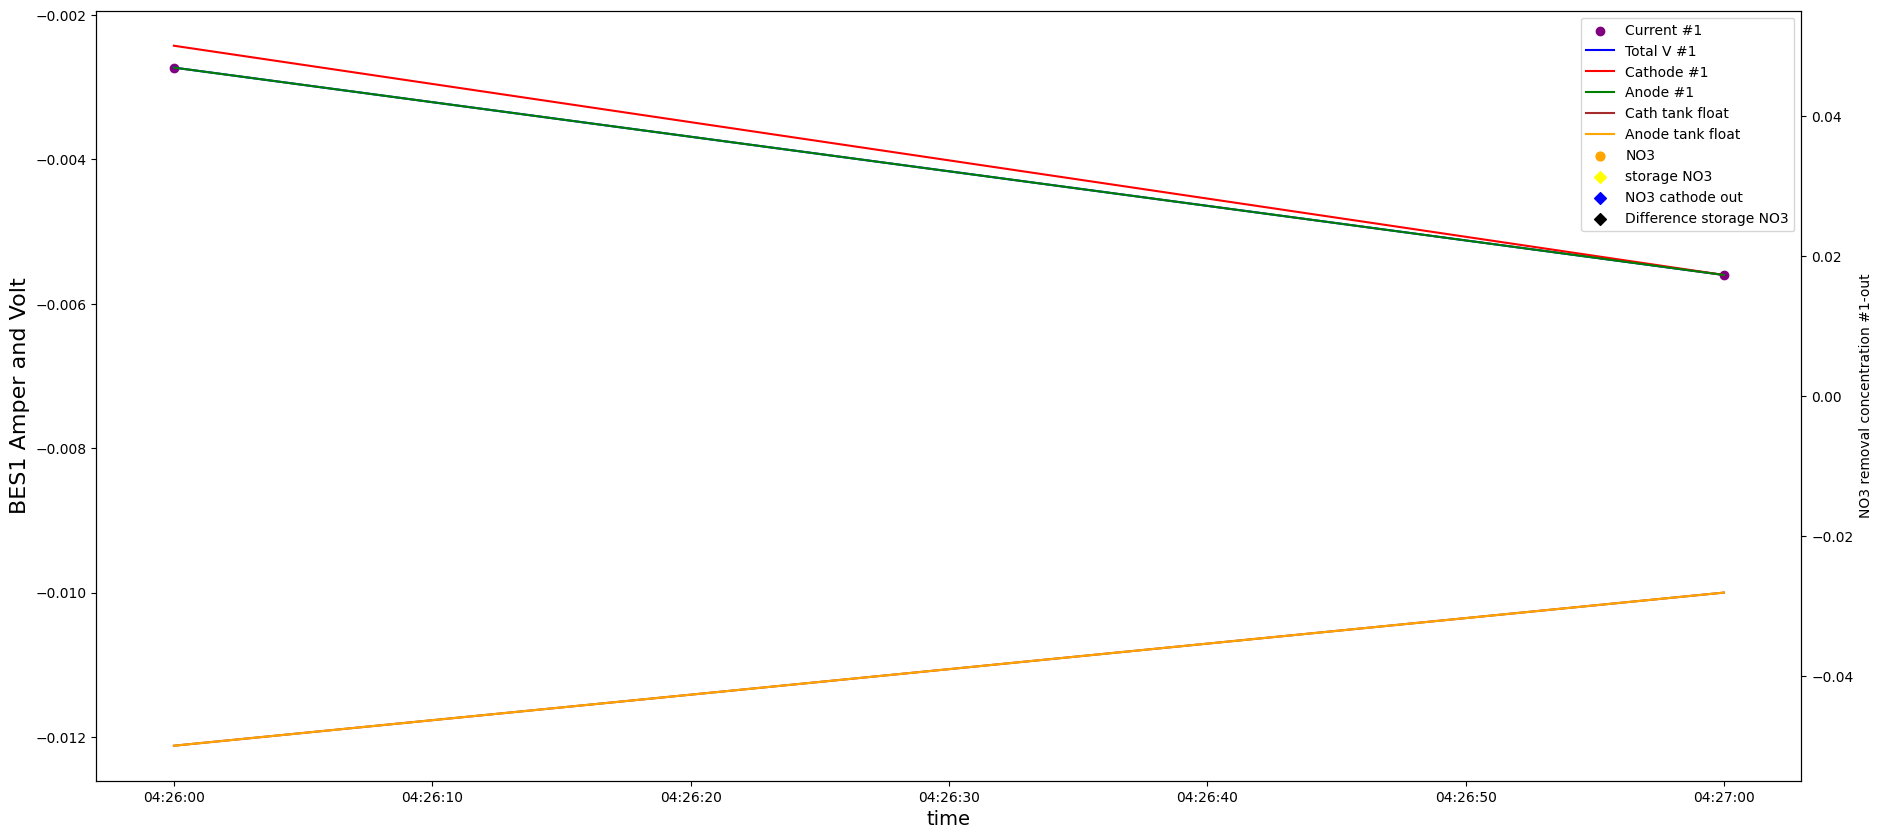

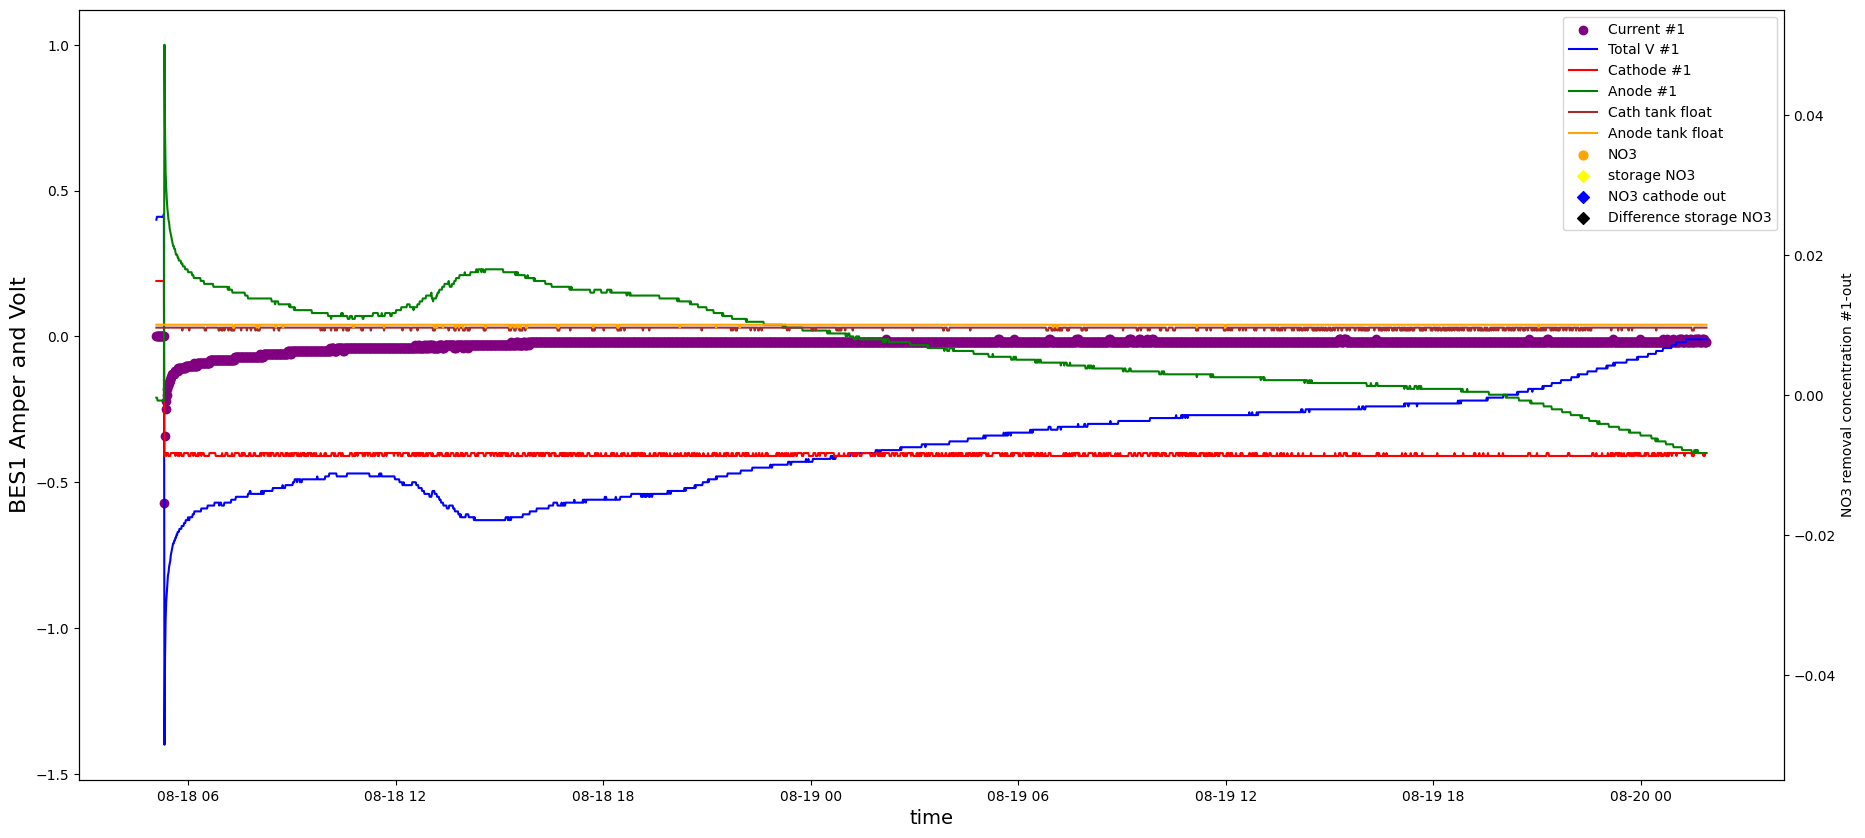

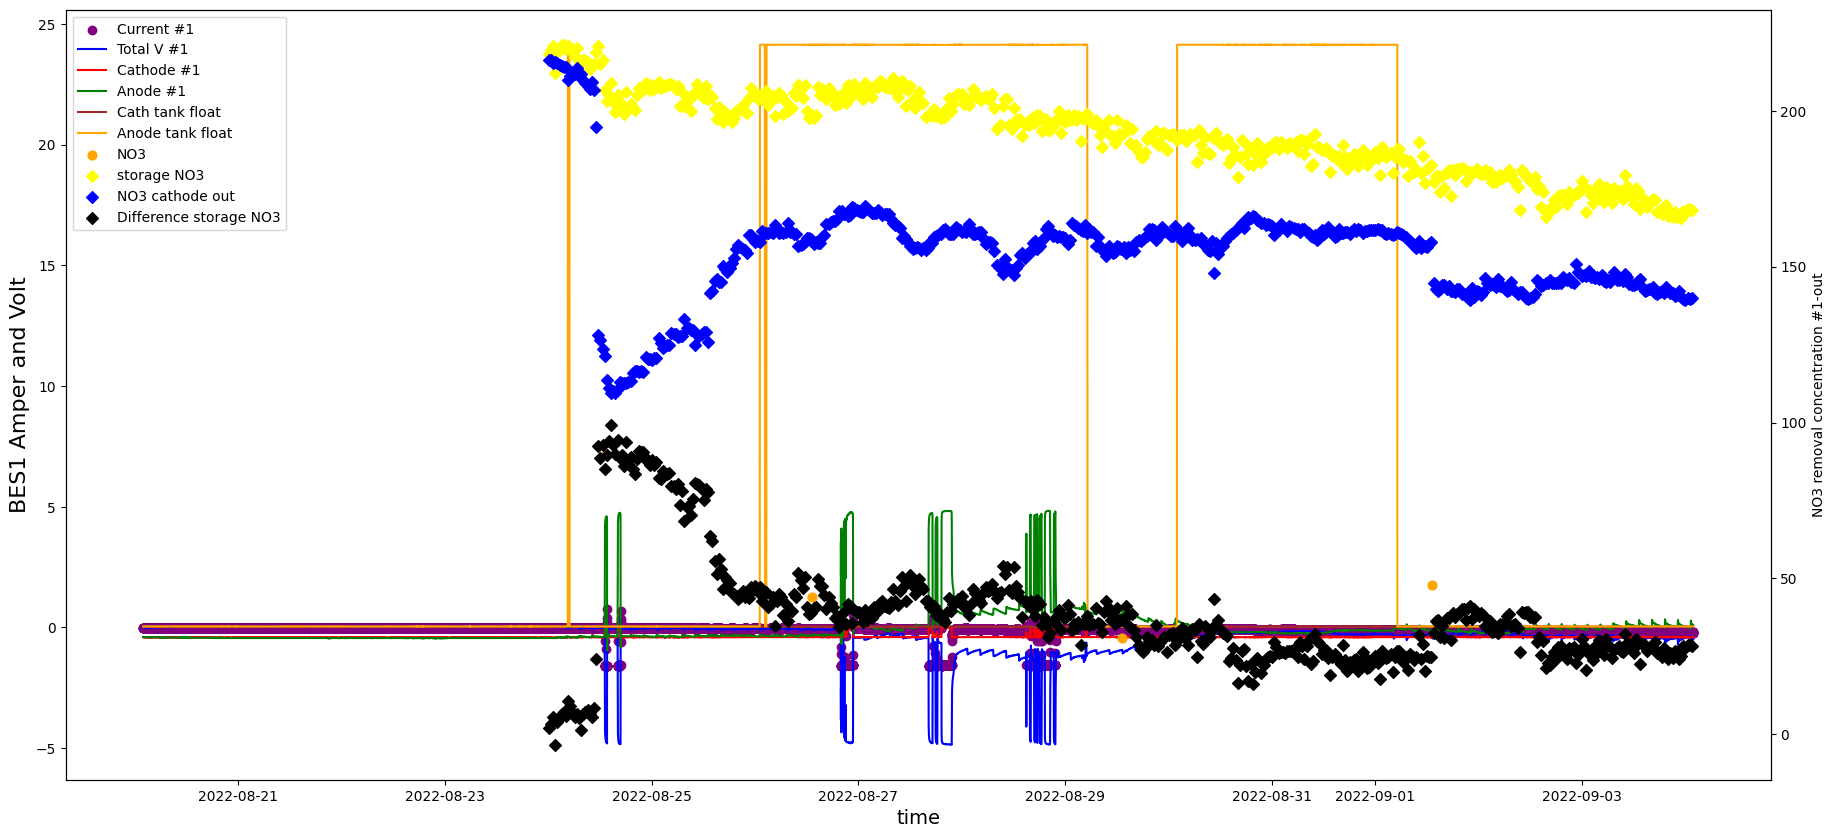

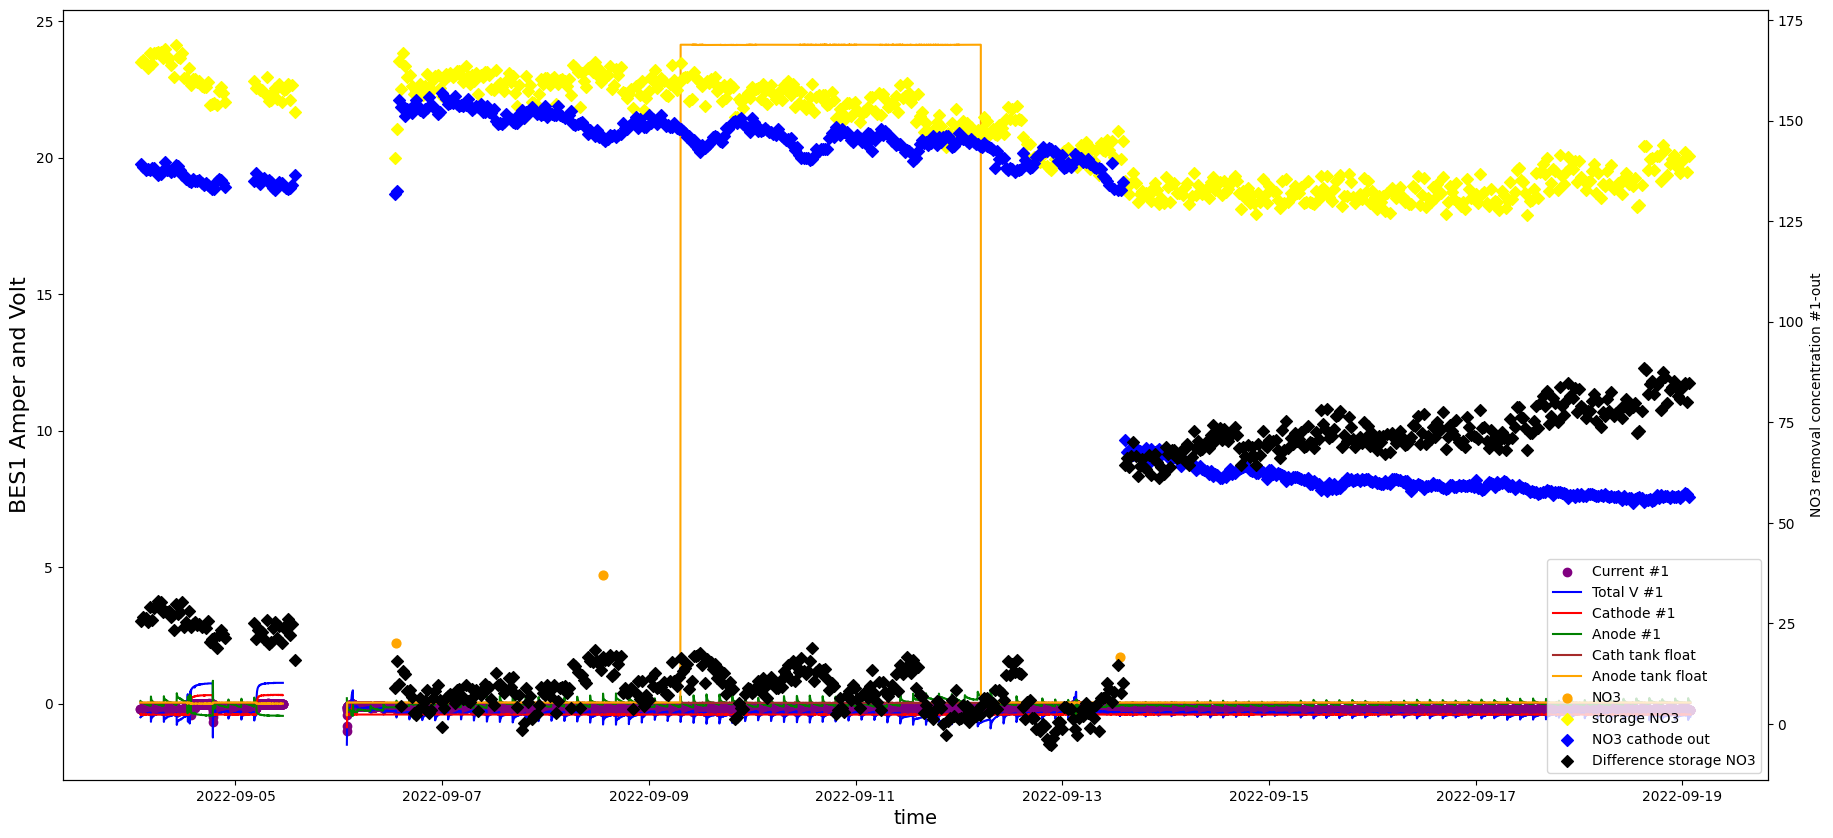

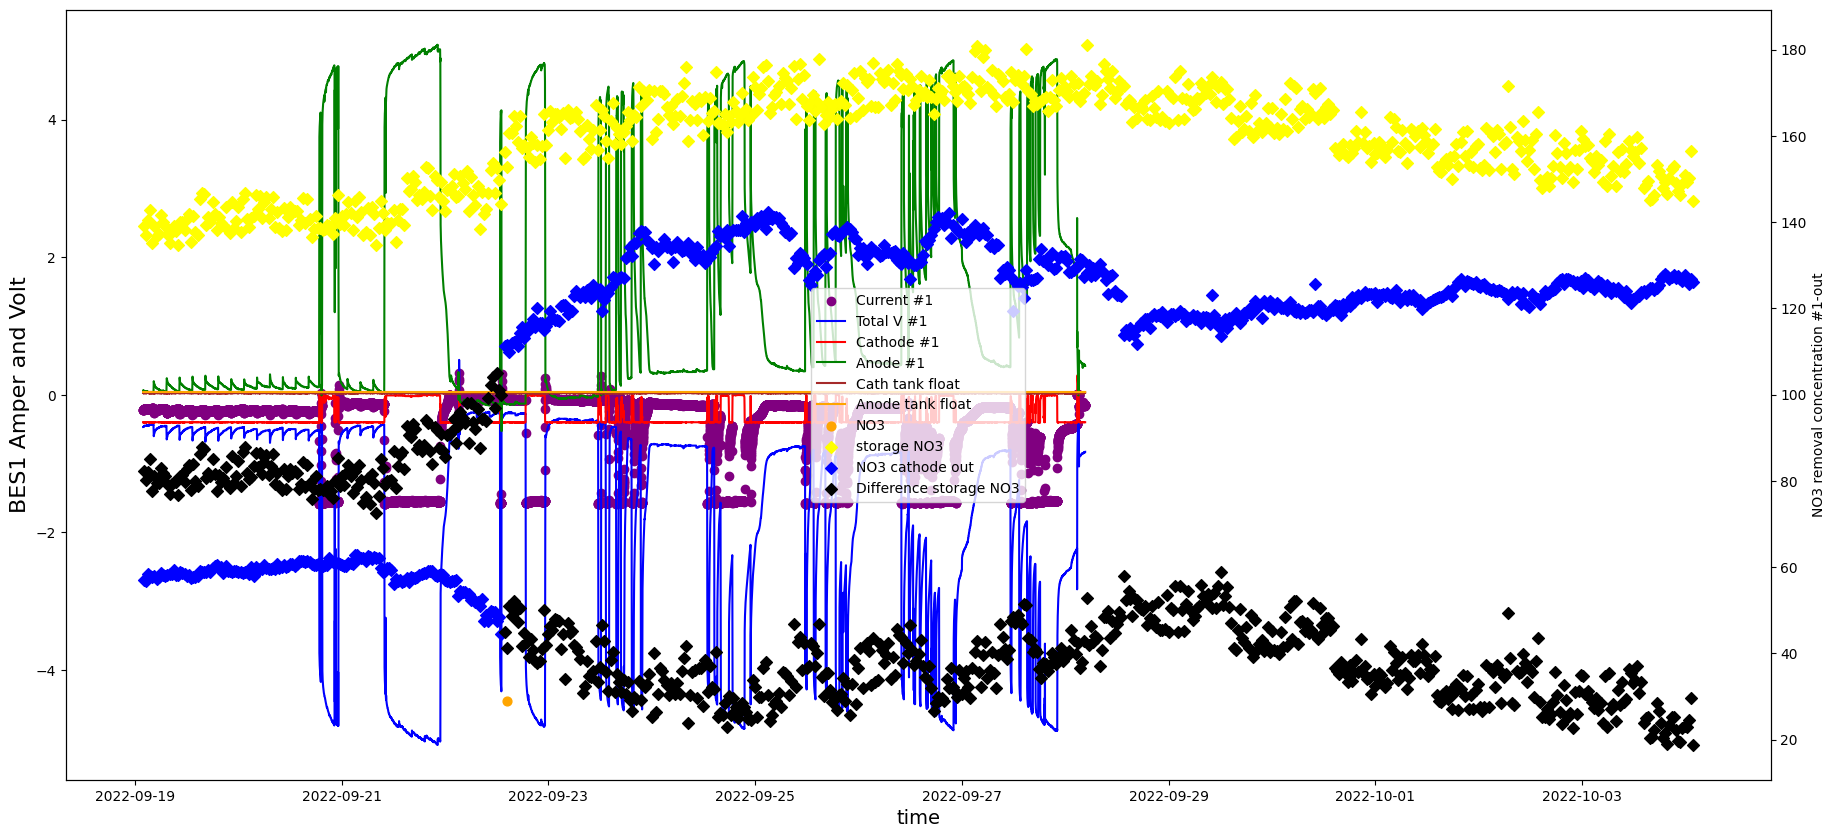

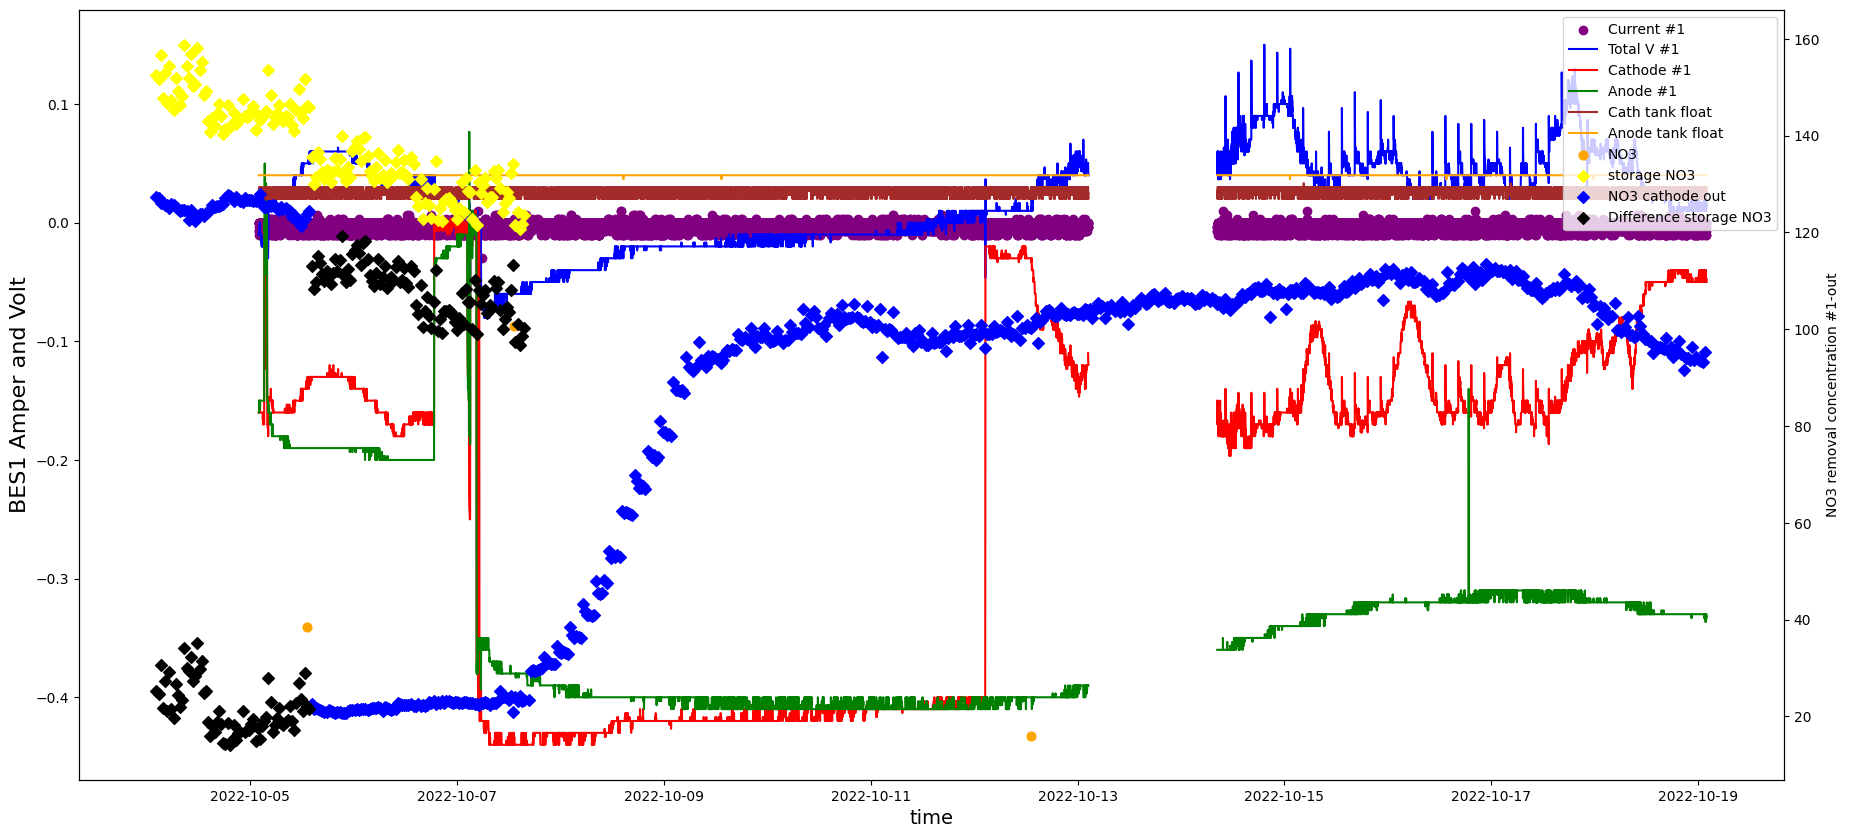

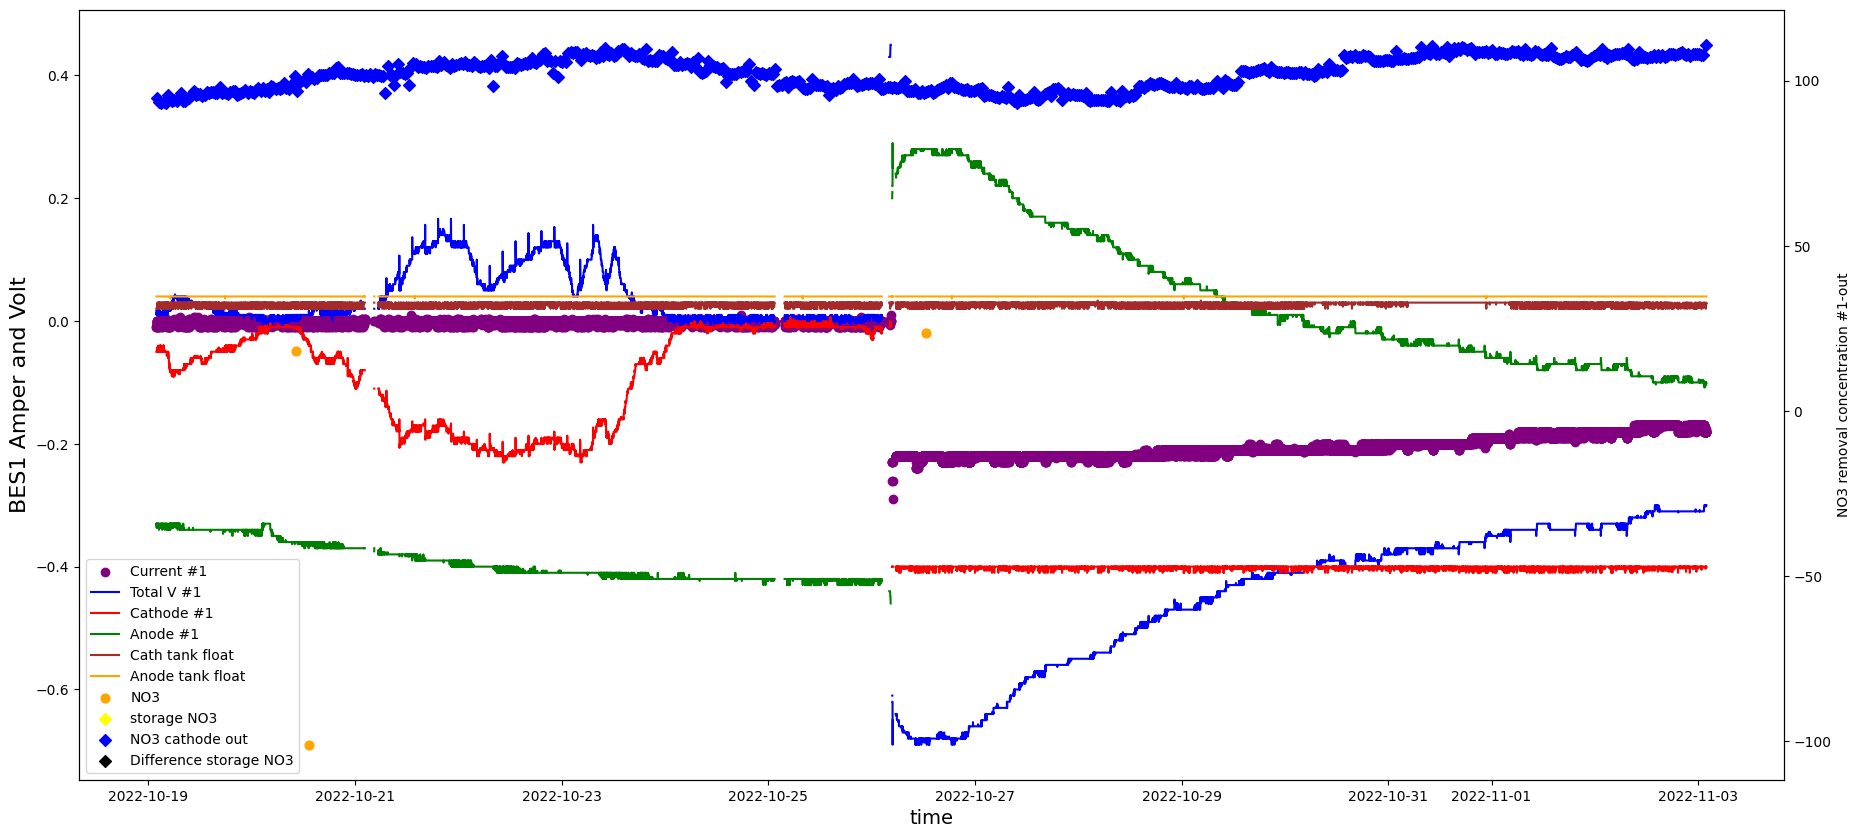

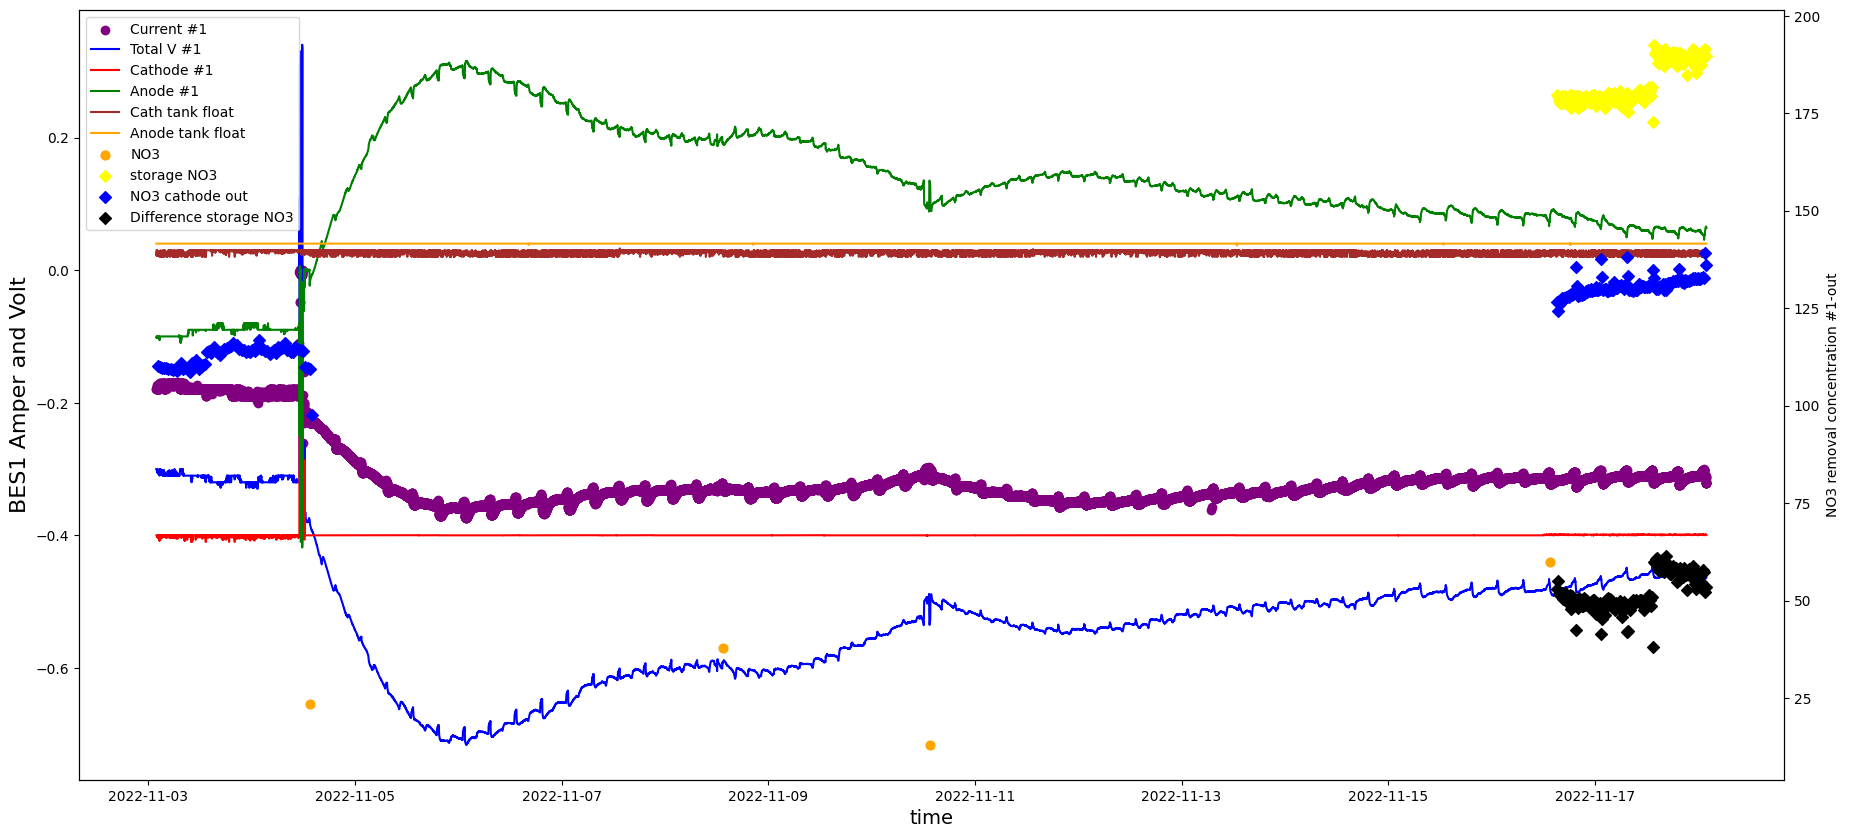

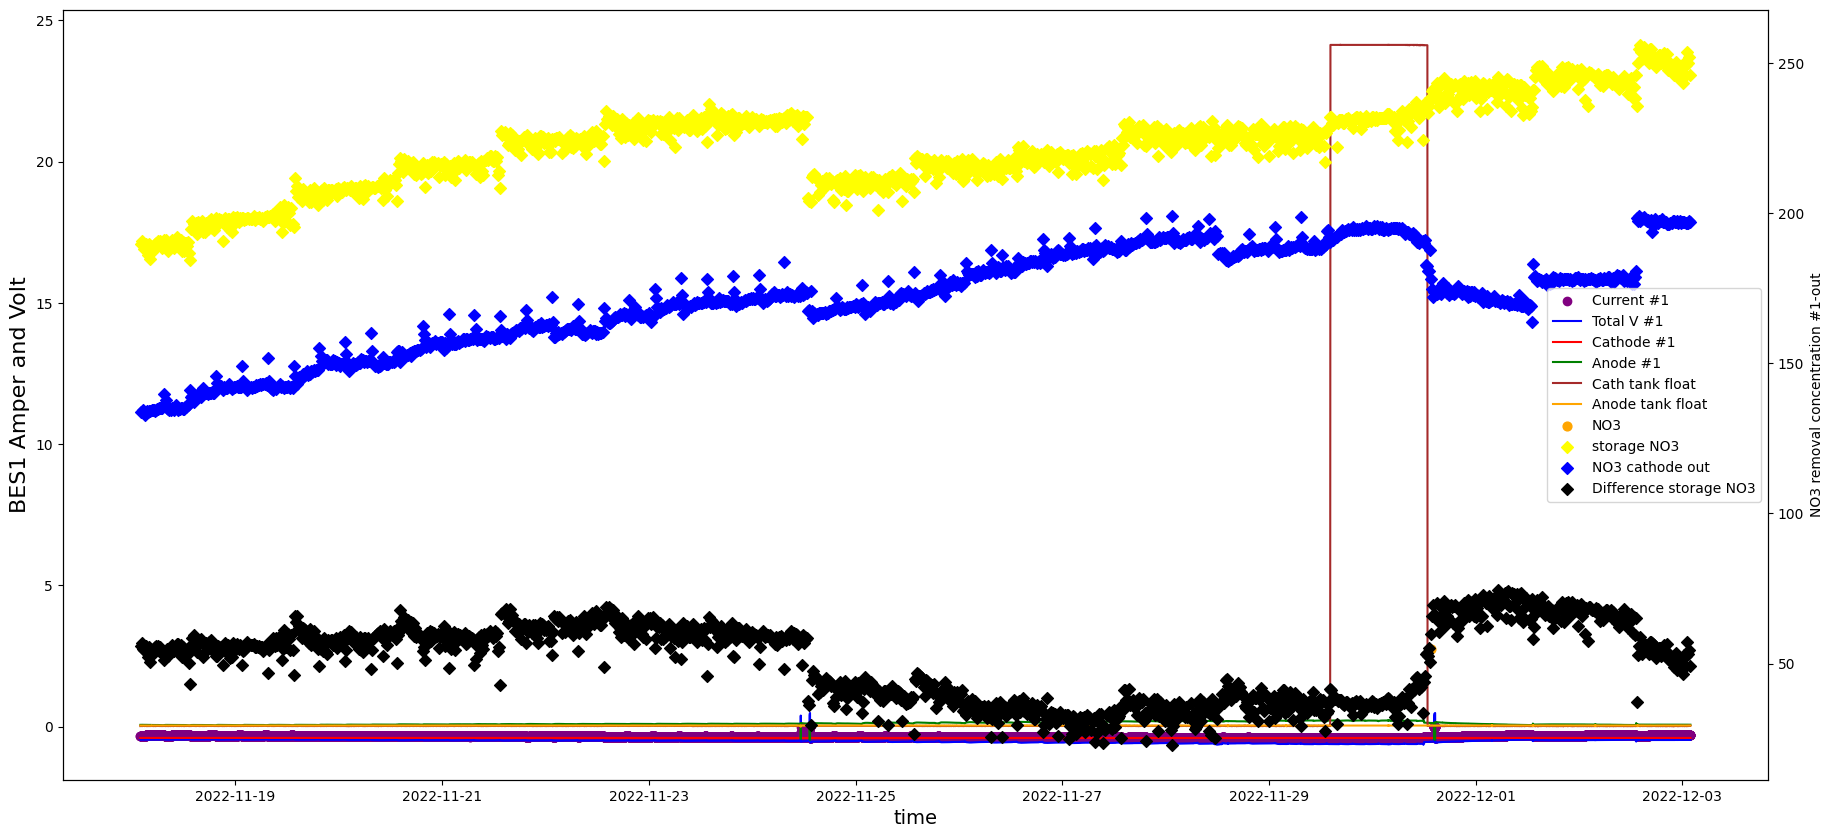

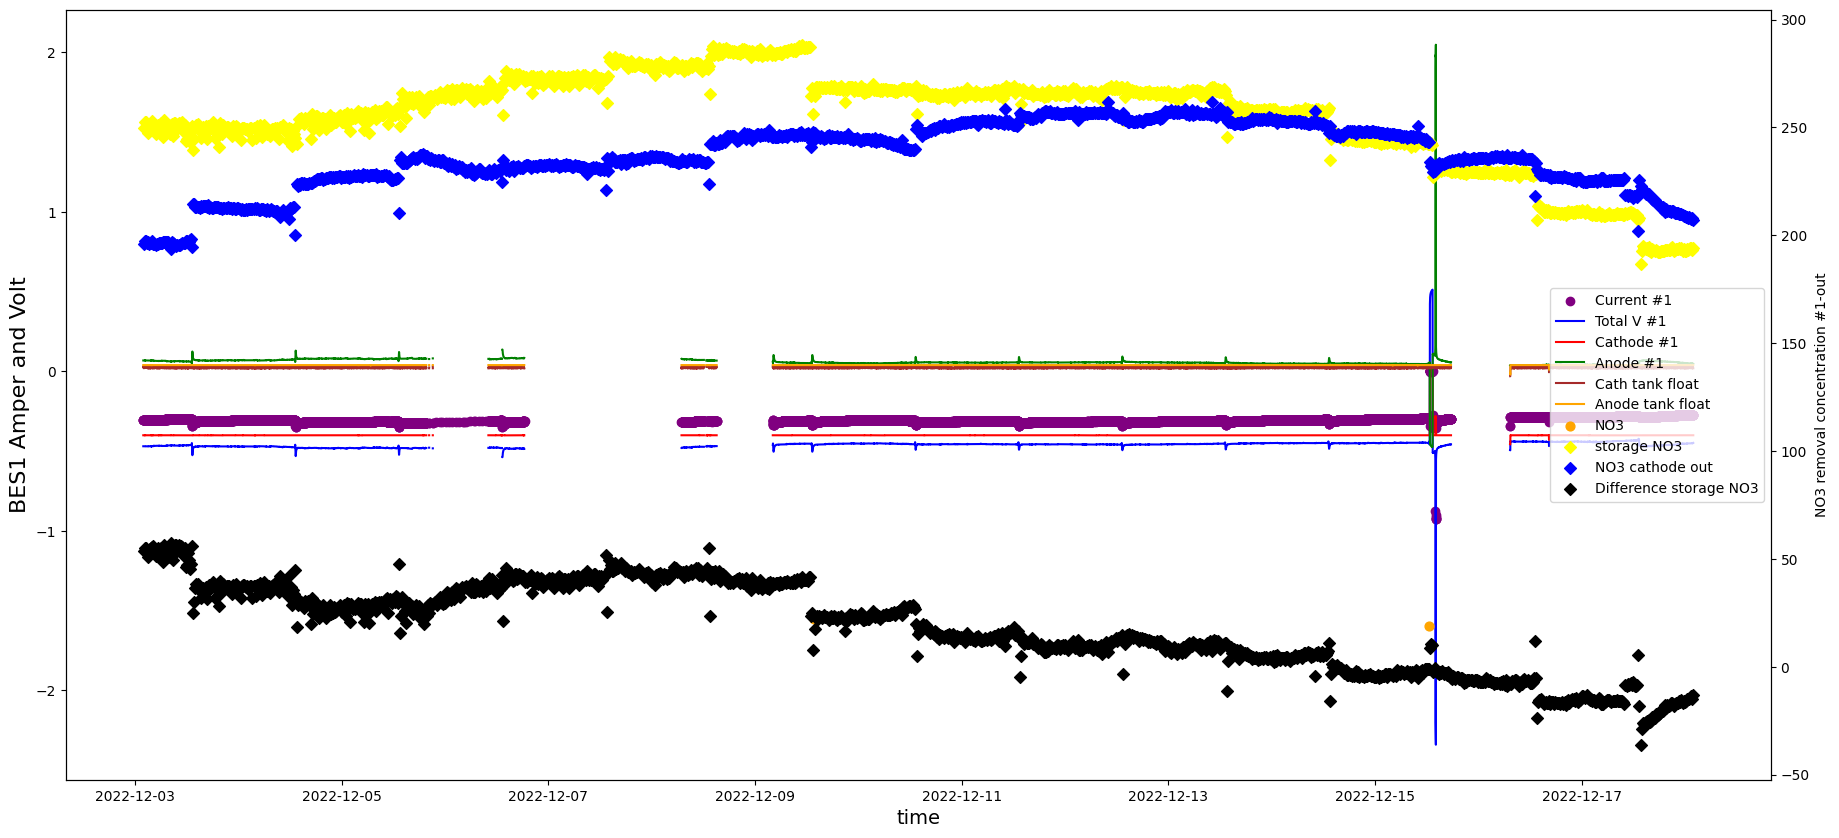

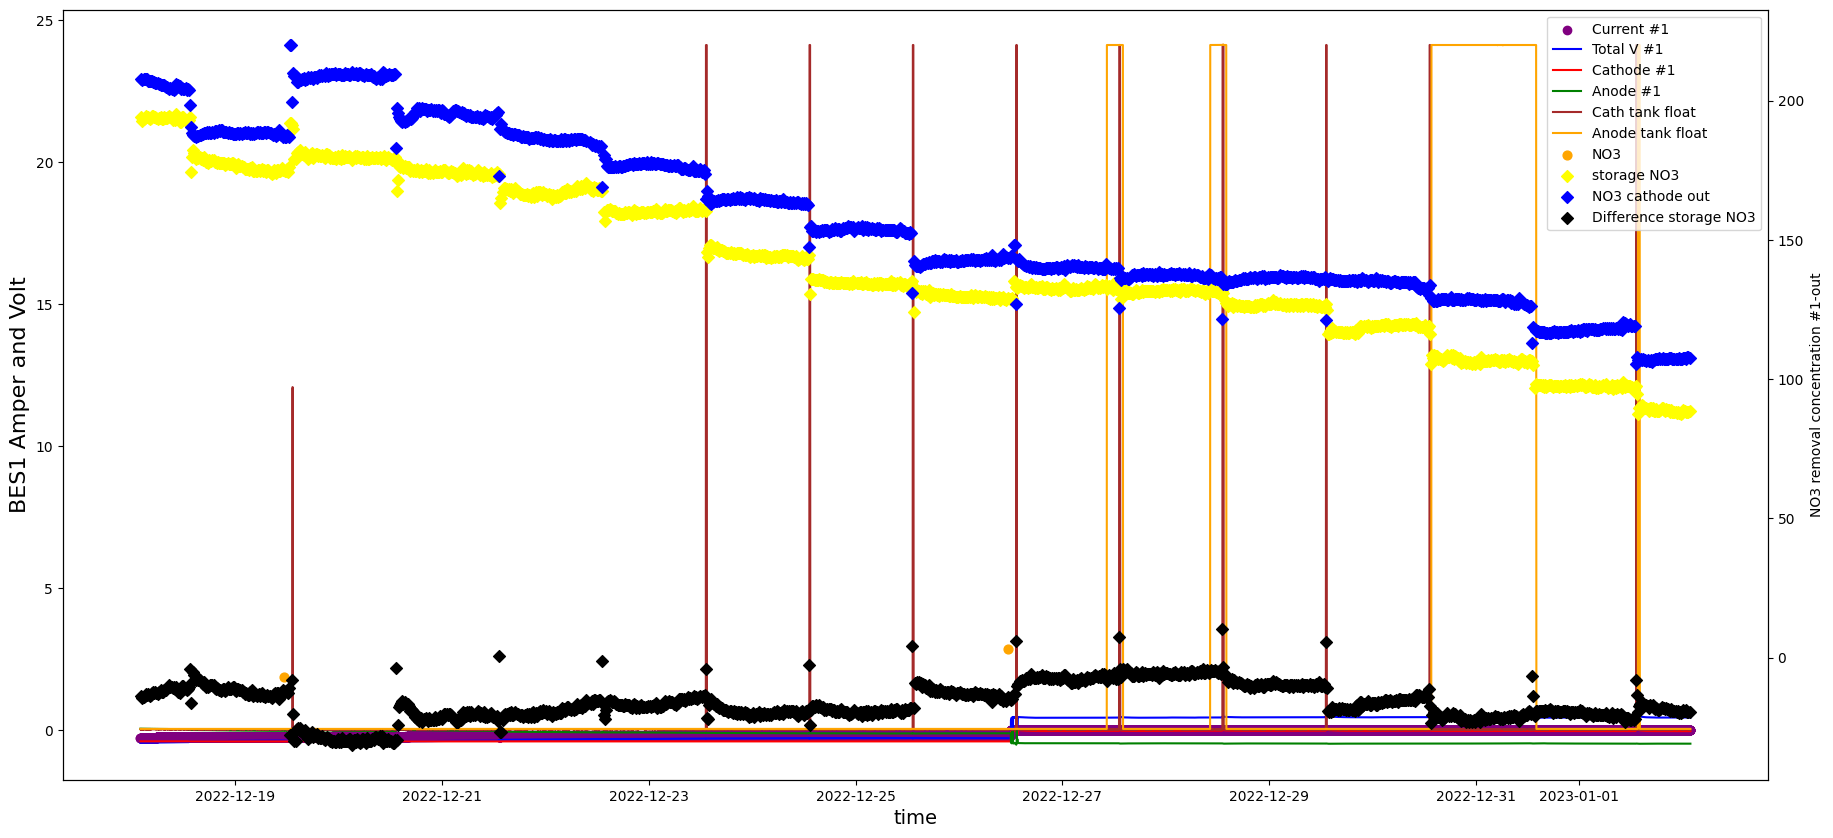

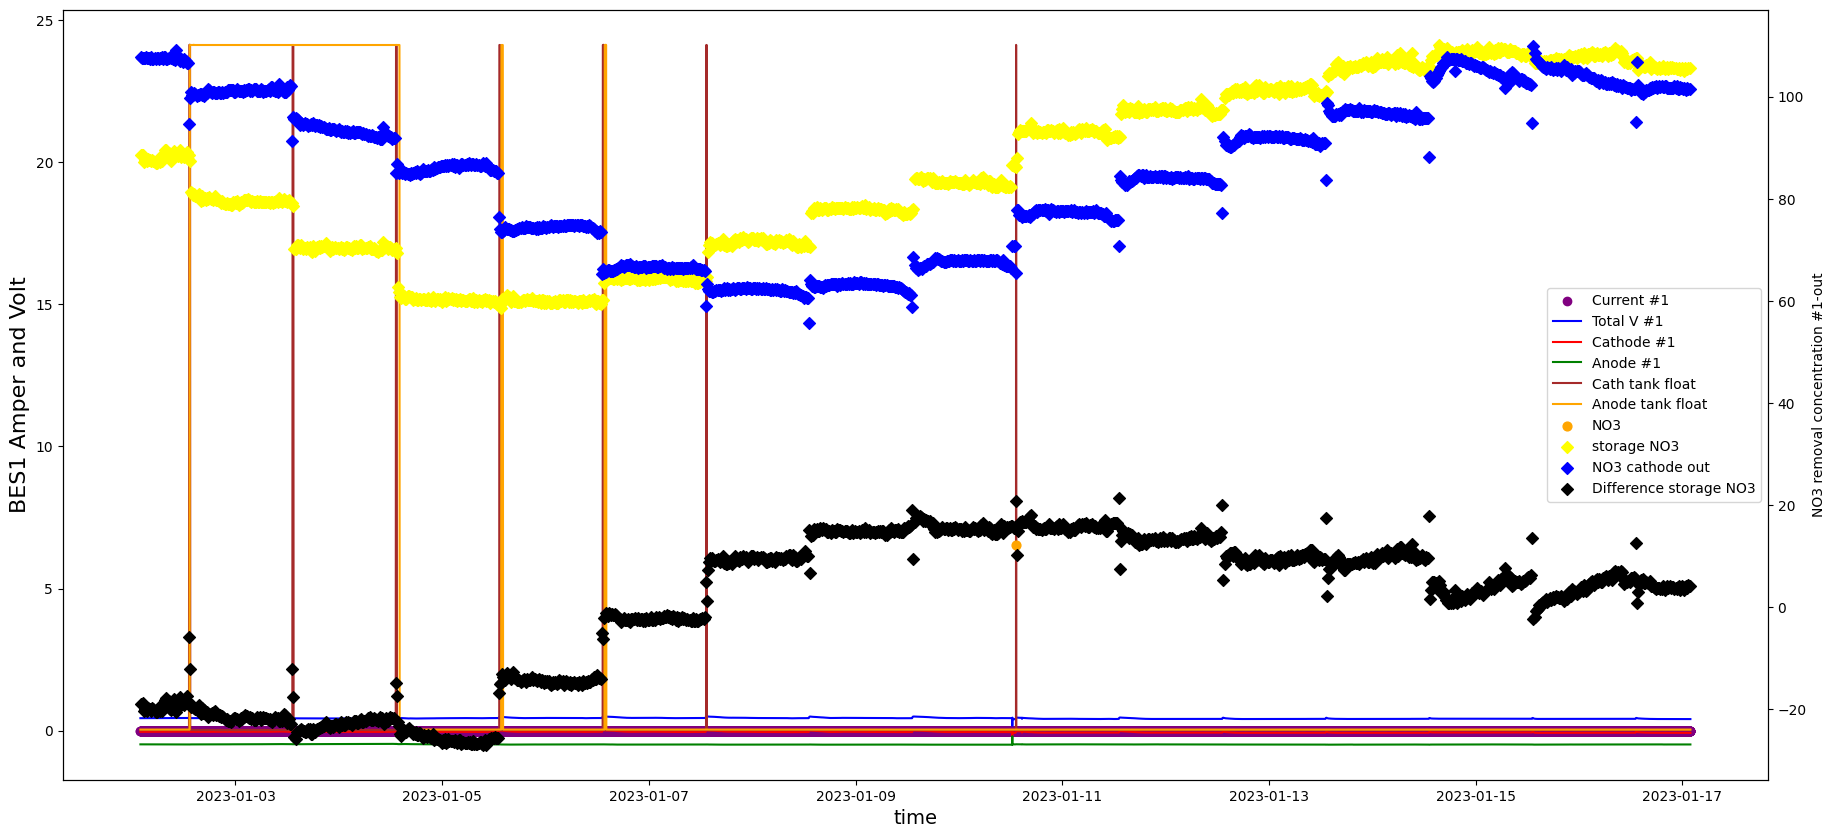

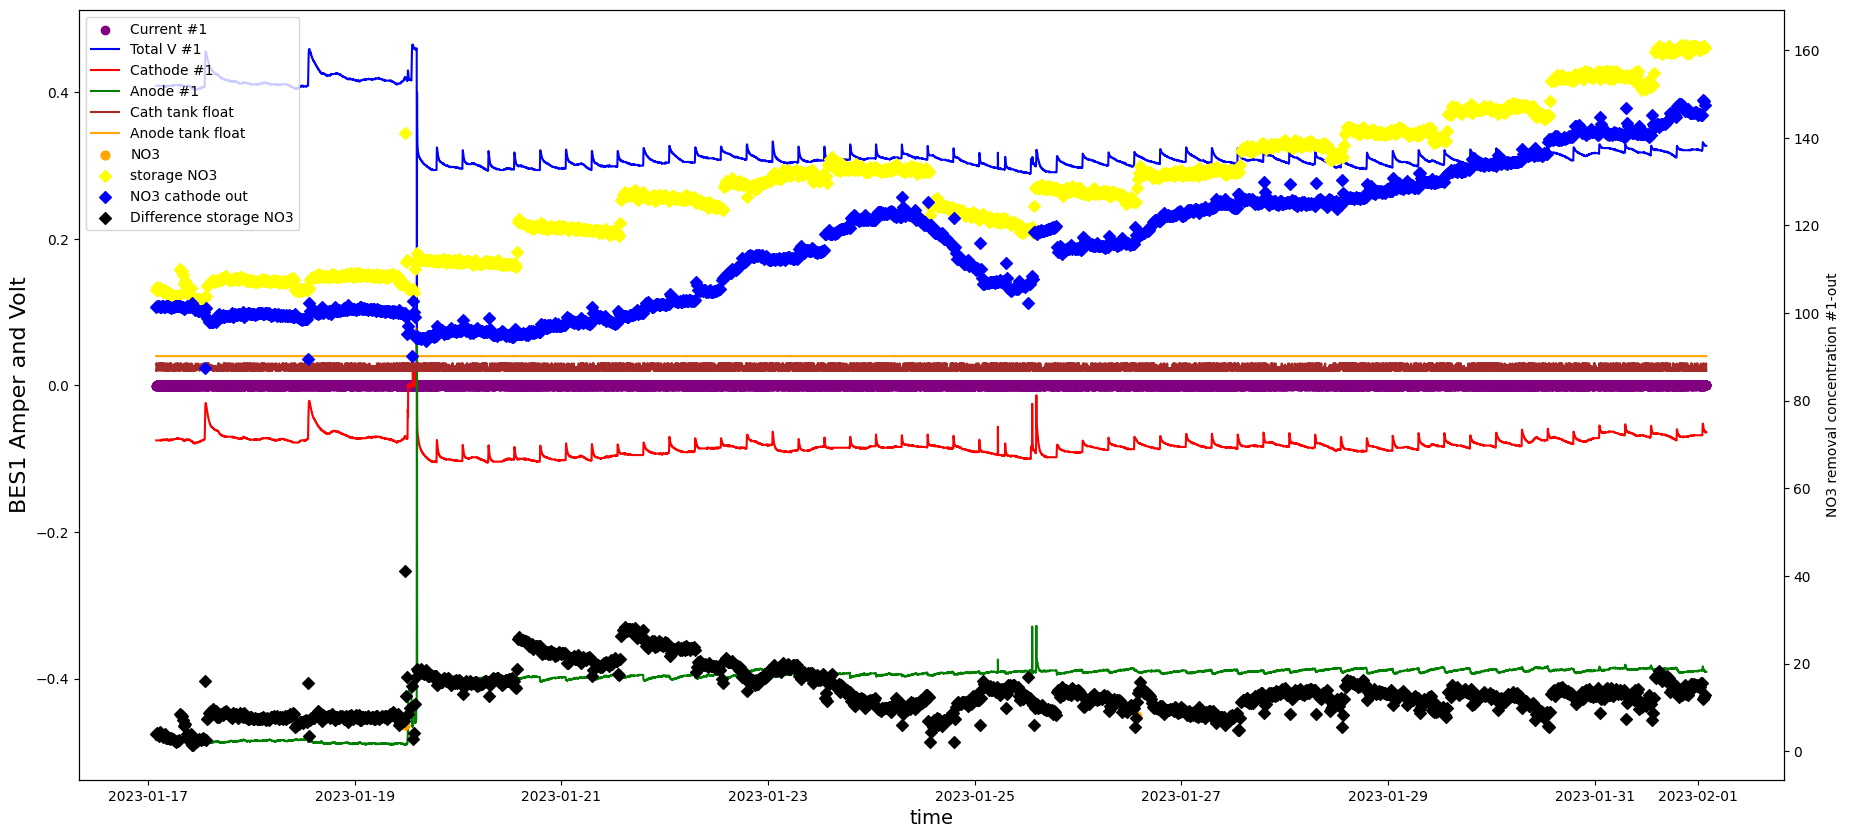

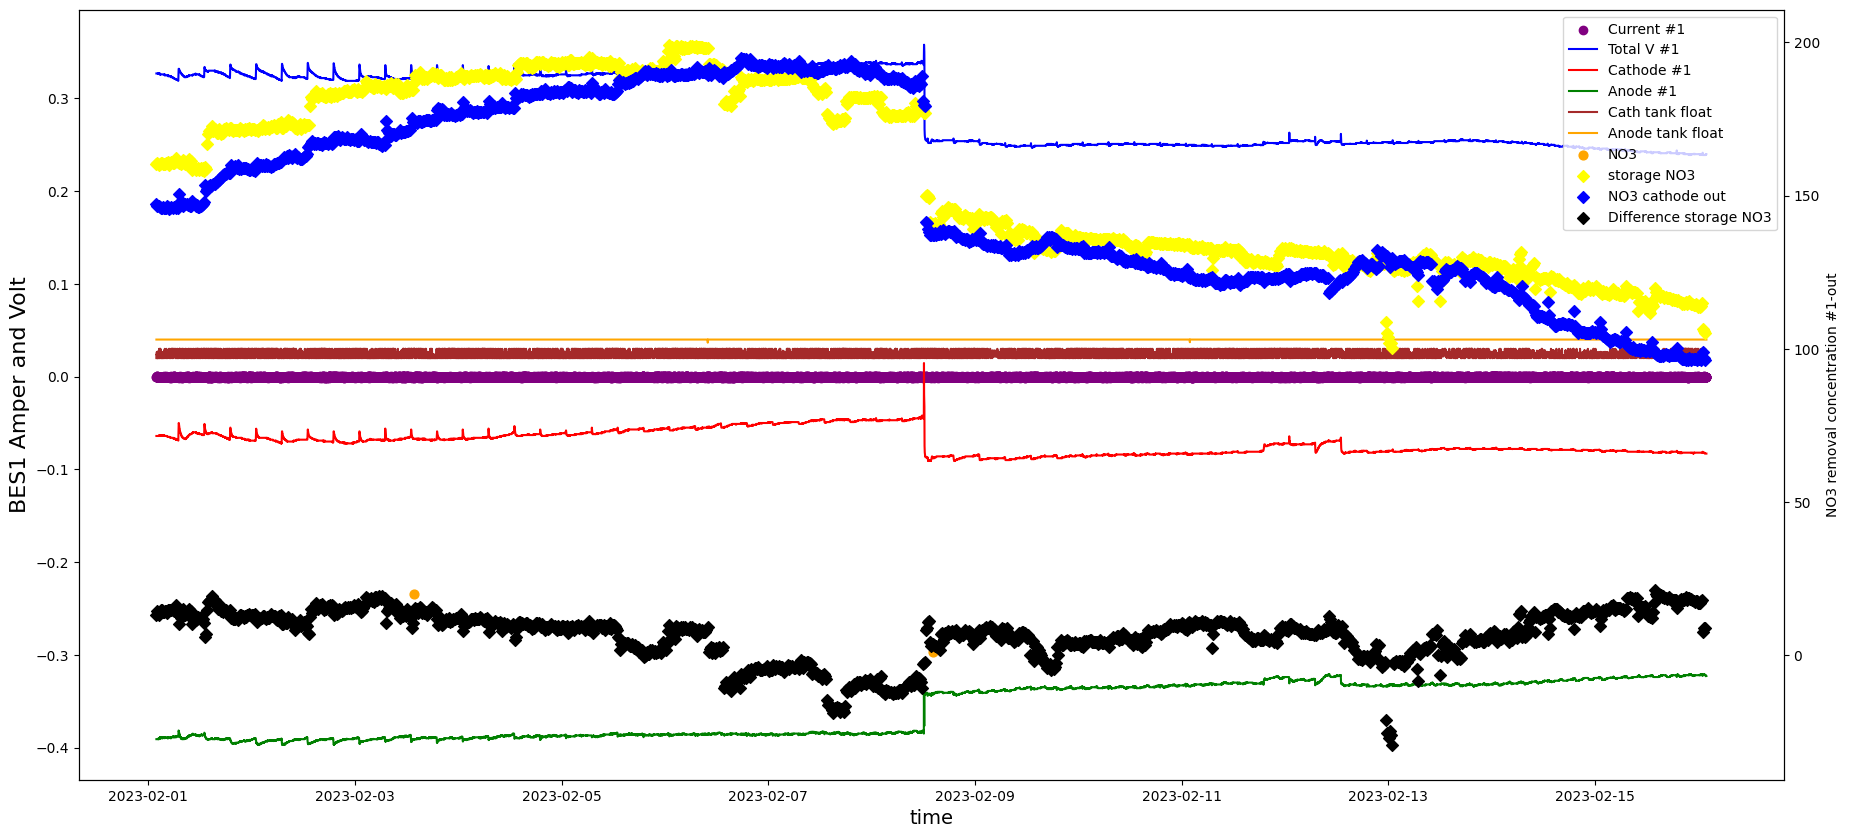

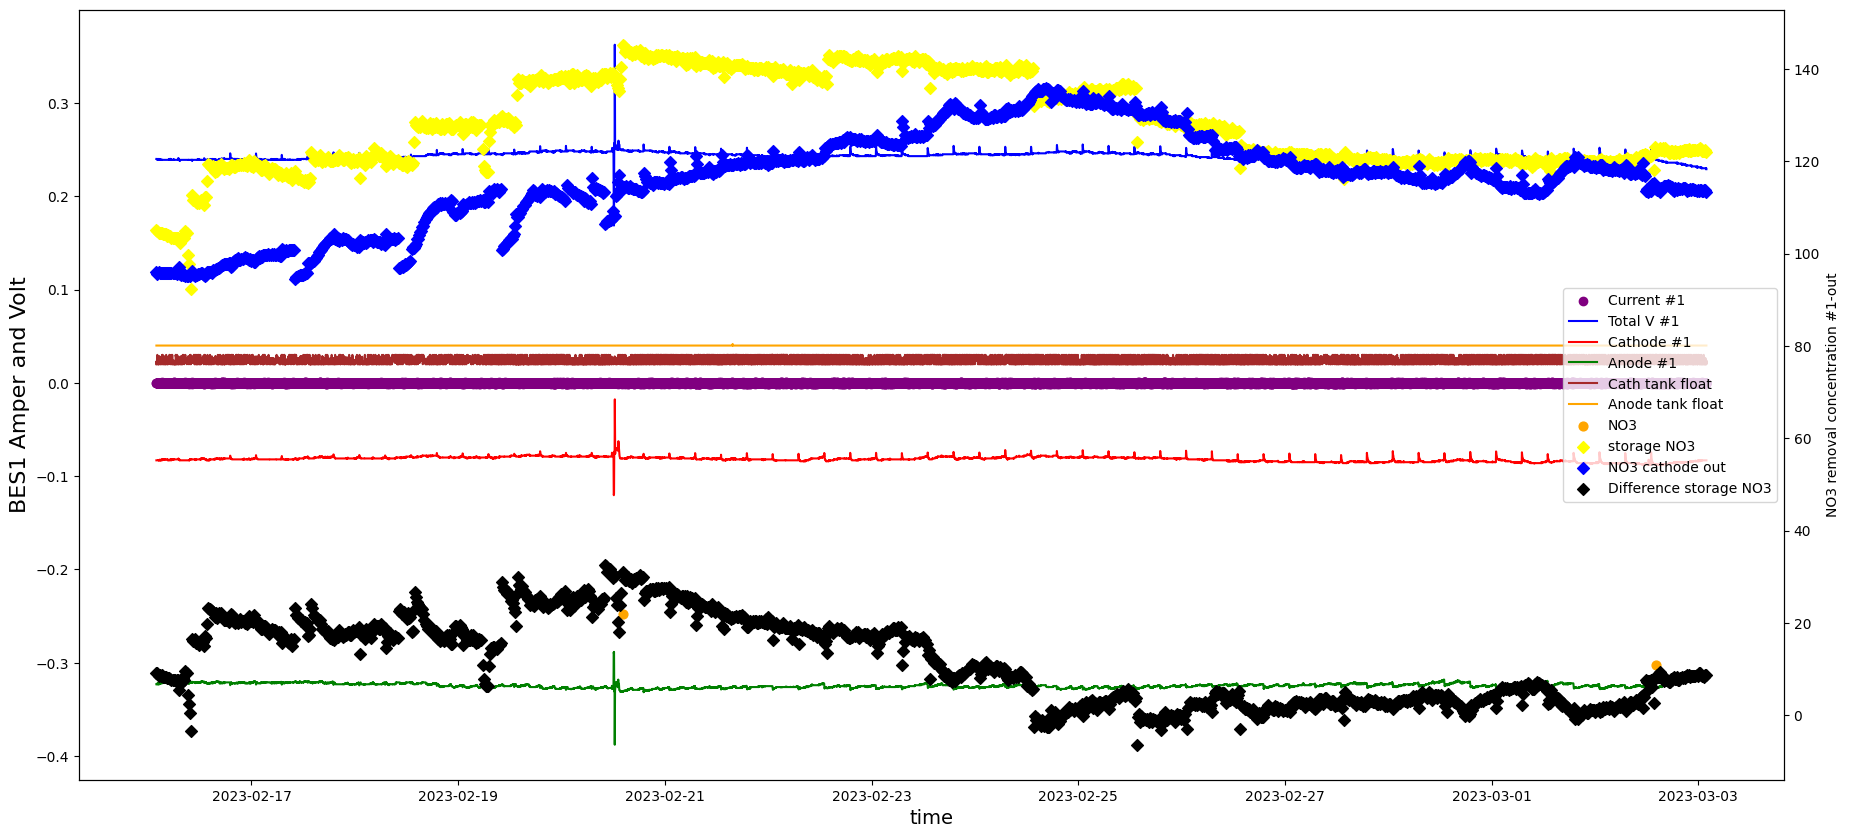

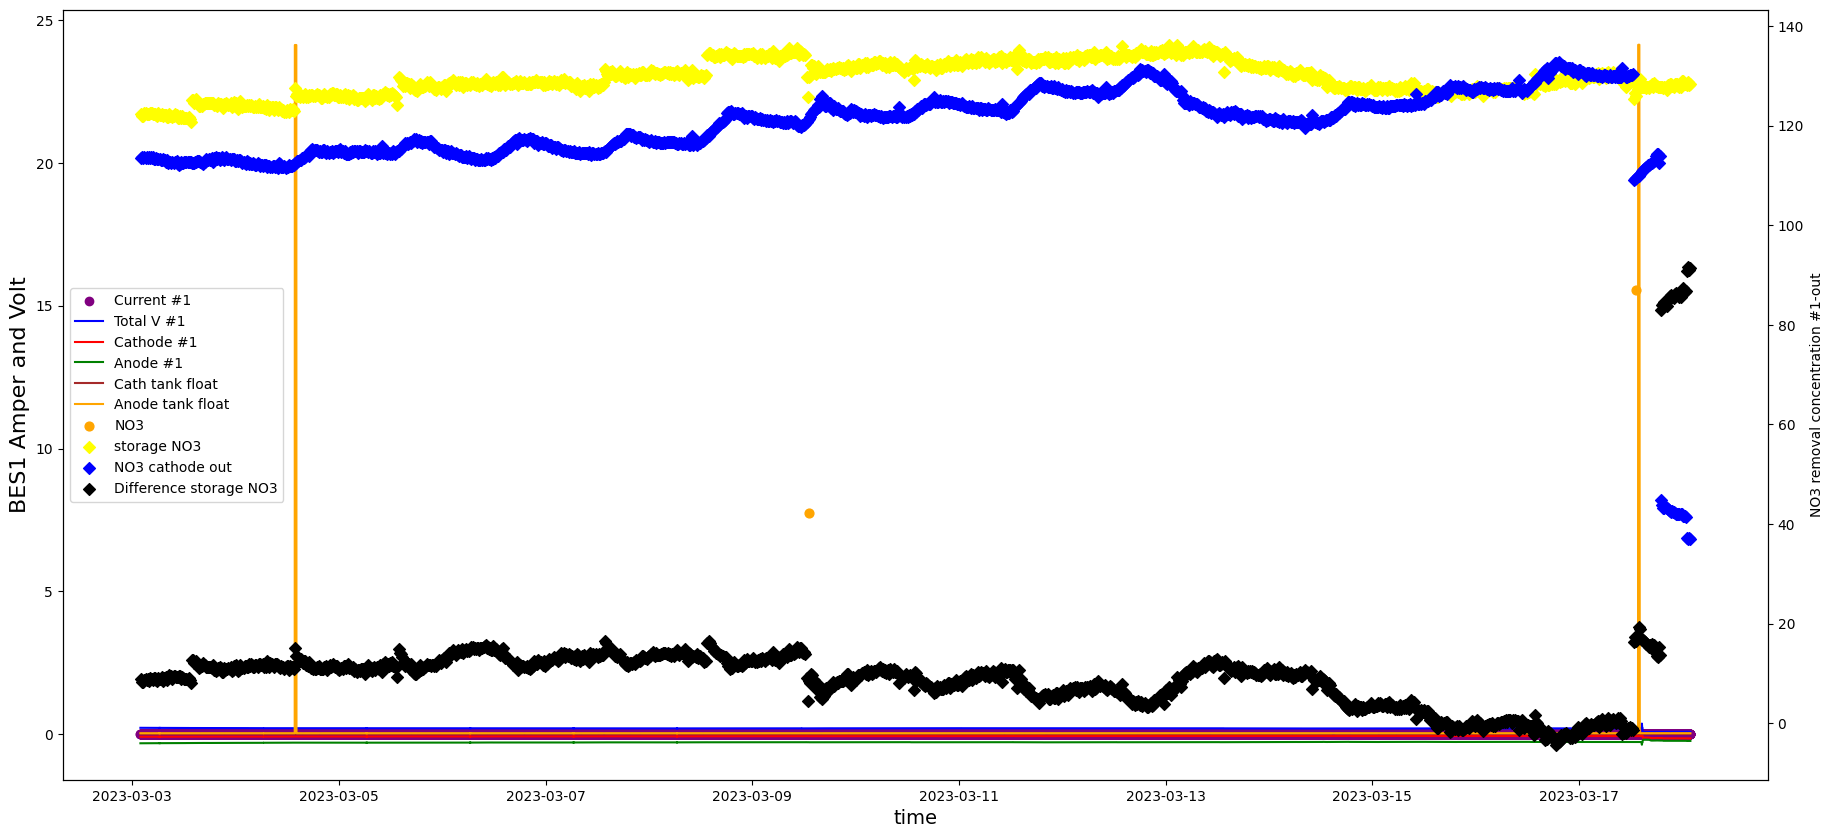

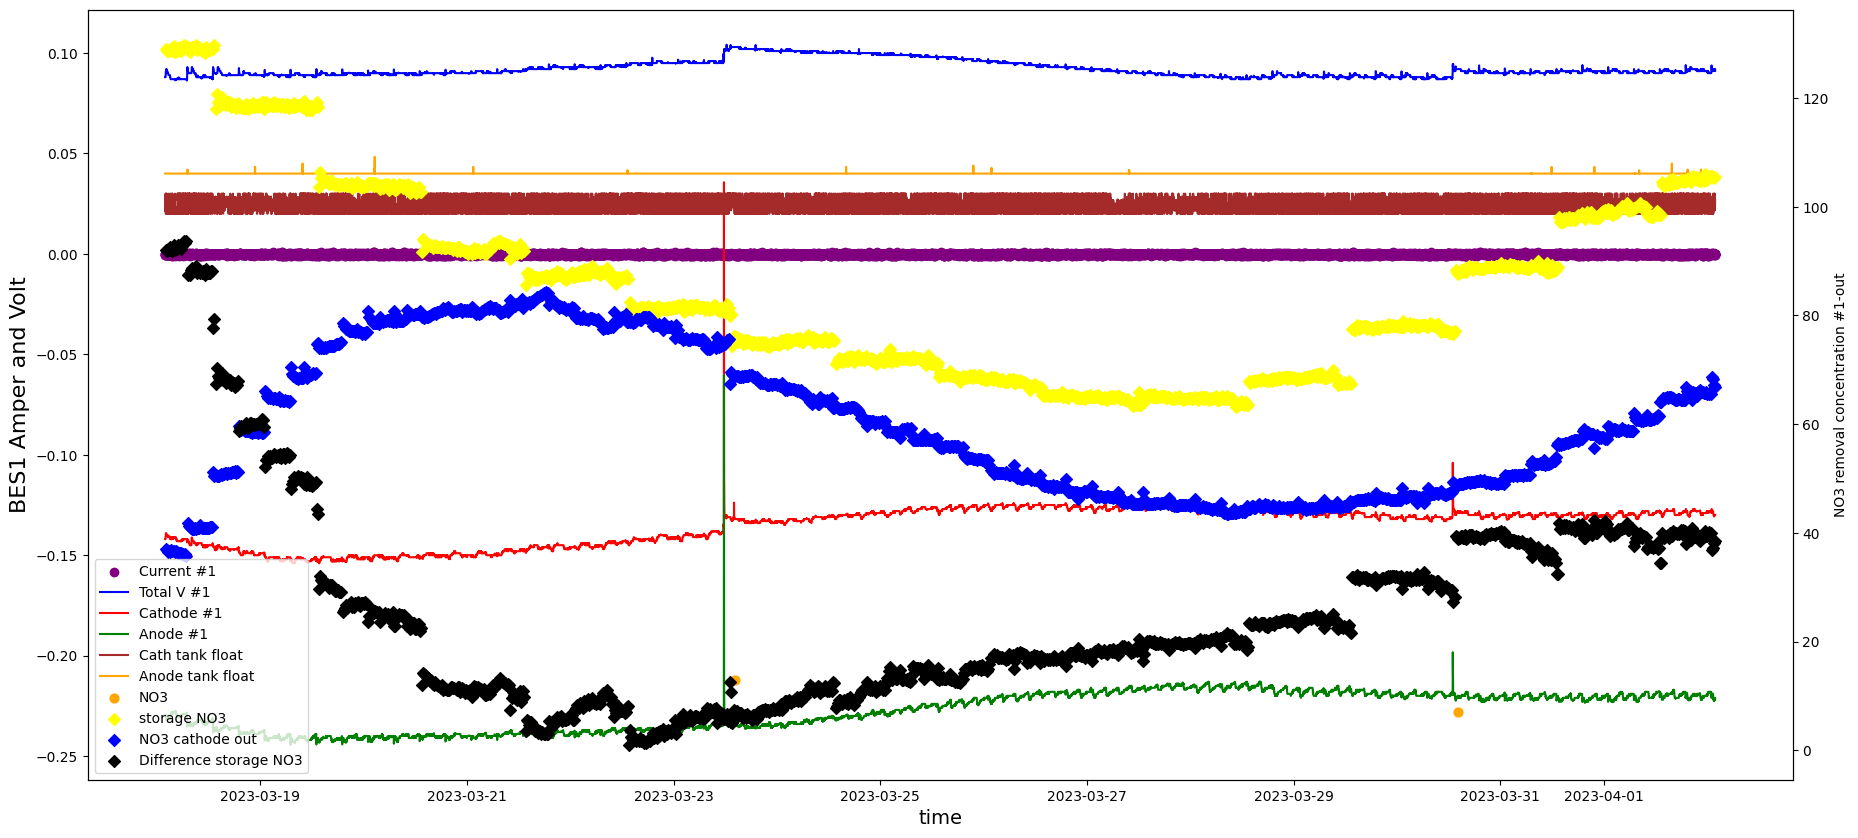

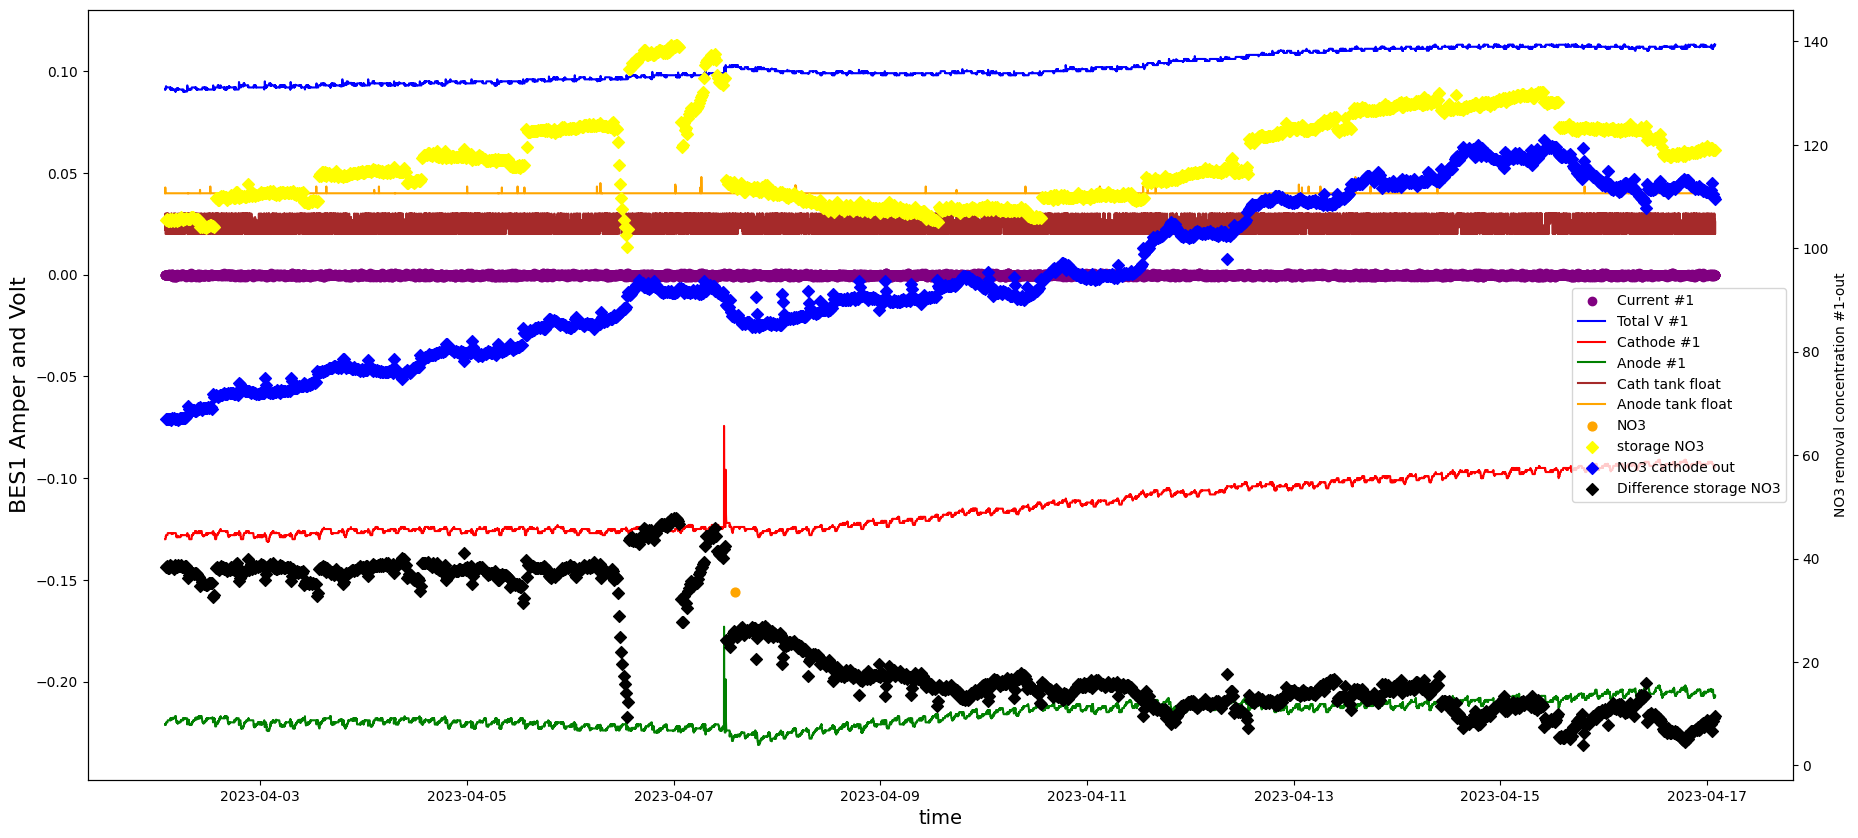

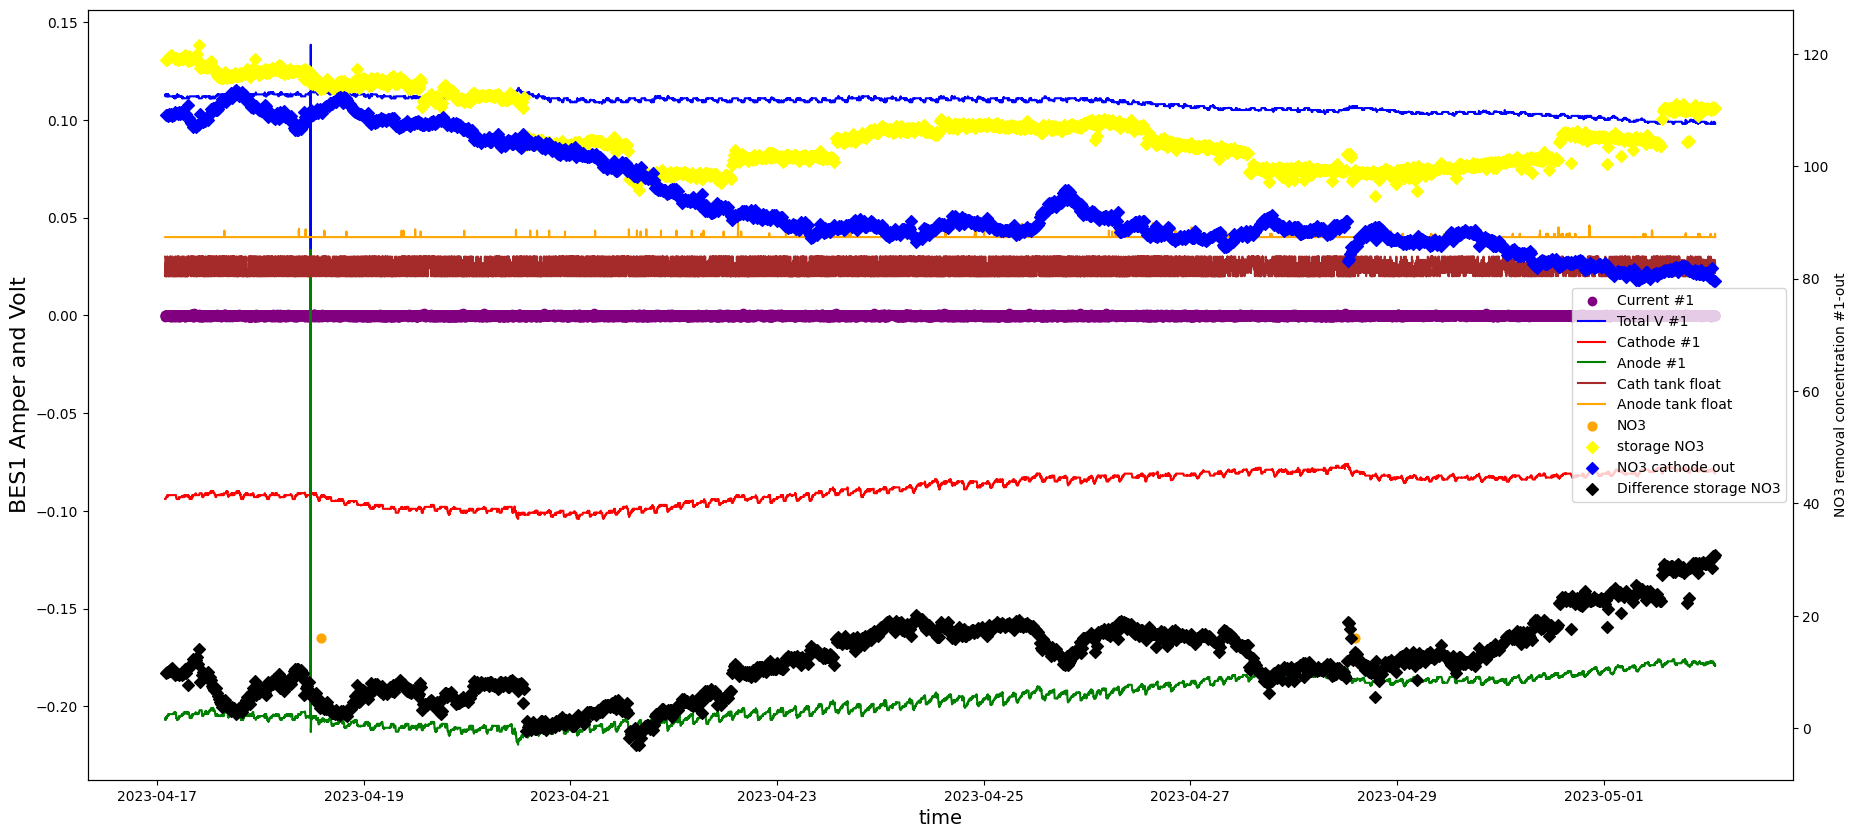

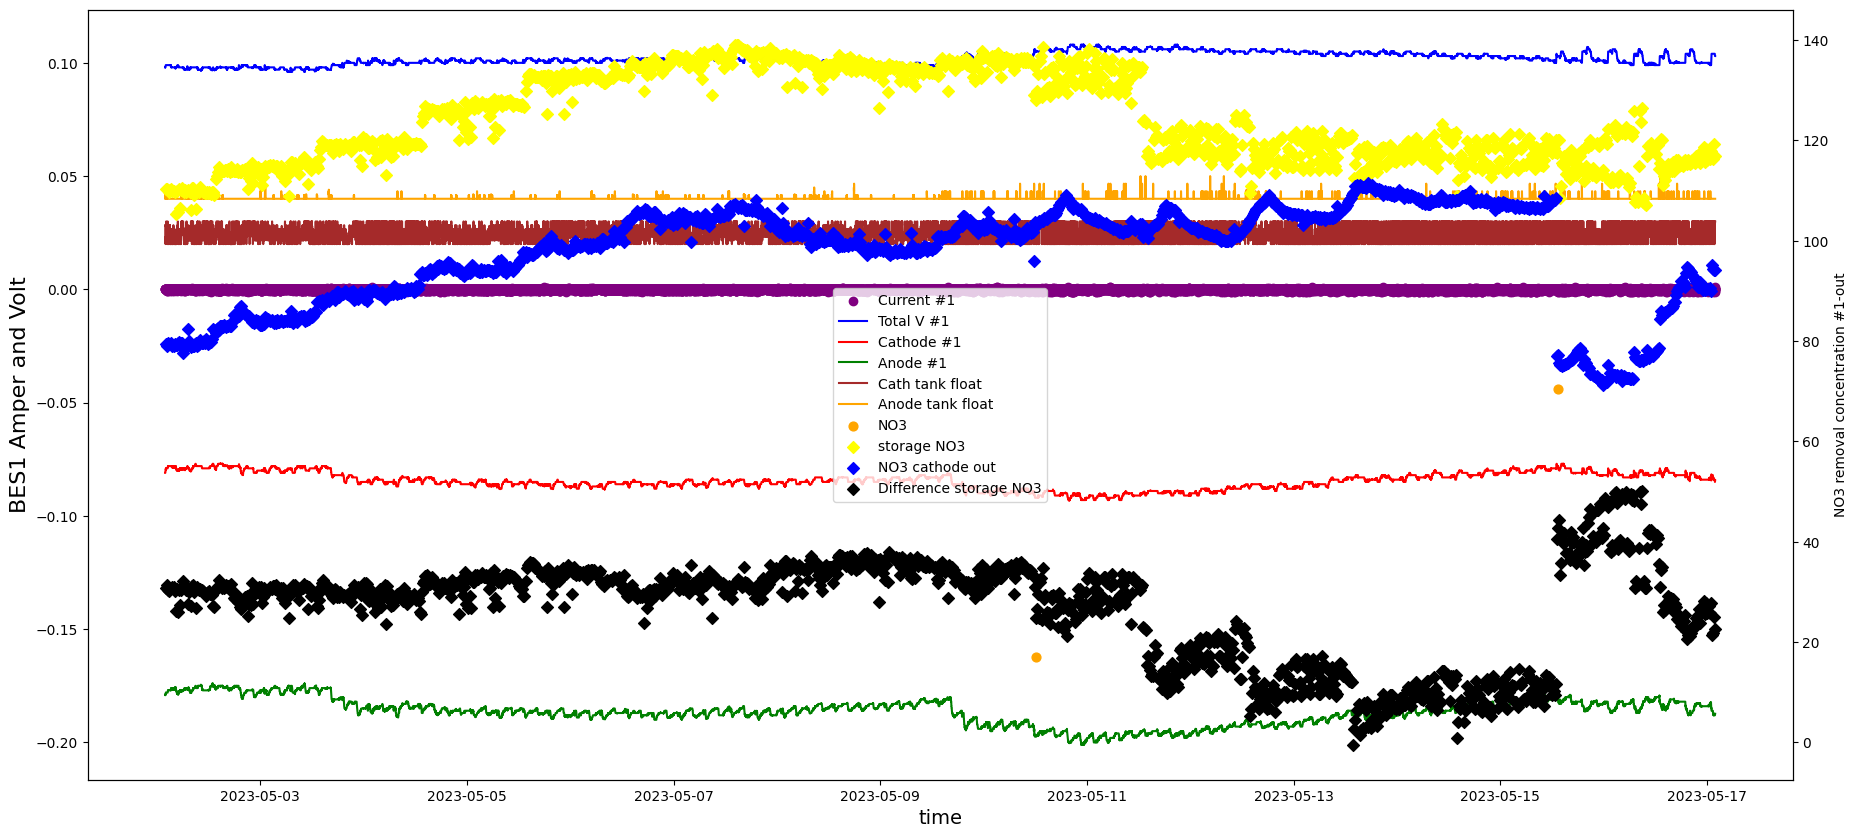

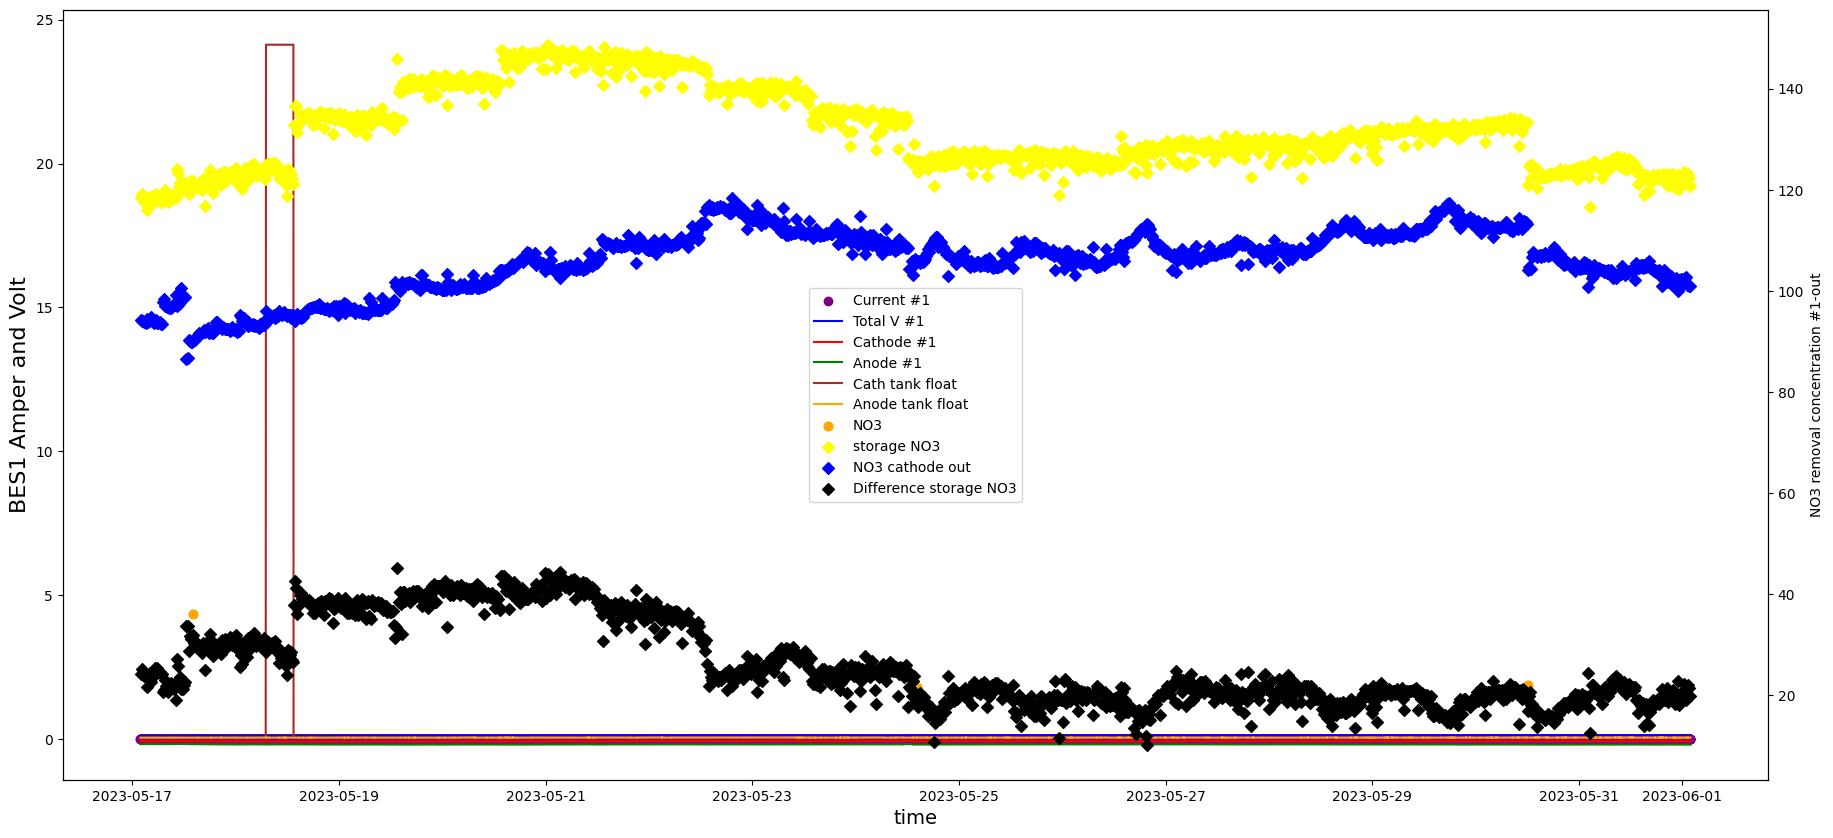

In [ ]:
plot_15(df_min)

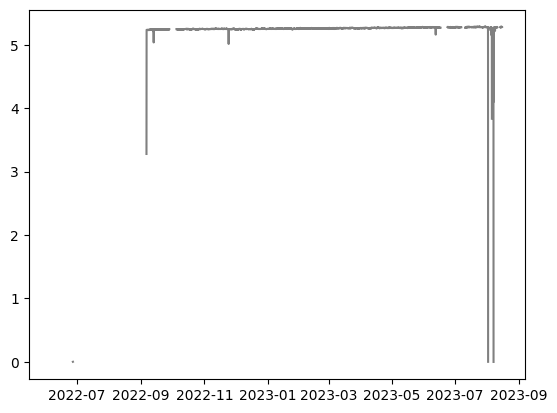

In [ ]:
plt.plot(df_h['Power'].index, df_h['Power'], color = 'gray', label ='Power')

In [ ]:
df['Power'].count(), df_h['Power'].count()

(2008795, 7600)

In [ ]:
df['Cathode #1'].count(), df_h['Cathode #1'].count()

(2070834, 8042)

In [ ]:
CODcr(a) #1-out

In [ ]:
for col, count in df.count().items():
  print(f"{col} :  -   {count}")

DateTime :  -   2072571
Cathode #1 :  -   2070834
Current #1 :  -   2070834
Anode #1 :  -   2070834
Total V #1 :  -   2070834
Temp anode #1 :  -   2068266
Cathode #2 :  -   2070834
Current #2 :  -   2070834
Anode #2 :  -   2070834
Total V #2 :  -   2070834
Temp anode #2 :  -   2070834
Cathode pump #1 :  -   2070834
Cathode pump #2 :  -   2070834
Anode pump #1 :  -   2070834
Anode pump#2 :  -   2070834
sludge mixing pump :  -   2070534
Temp anode storage :  -   2070404
Cath tank float :  -   2070534
Anode tank float :  -   2070534
Power :  -   2008795
NO3-N_sensor_Temp :  -   27388
NO3-N_sensor_Storage :  -   26050
NO3-N_sensor_C1_out :  -   27388
NO3-N_sensor_C2_out :  -   19243
BES1 Cathode :  -   54
BES1 Current :  -   56
BES1 Anode :  -   53
BES1 Total :  -   54
BES1 Temp :  -   50
BES2 Cathode :  -   51
BES2 Current :  -   51
BES2 Anode :  -   51
BES2 Total :  -   51
BES2 Temp :  -   49
data logger :  -   40
pH(a) Anode Tank :  -   47
pH(a) #1-out :  -   48
pH(a) #2-out :  -   48
C

In [ ]:
df_no_outliers = df.copy()

for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        if df[col].count() >= 100:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR


            df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

In [ ]:
# Определение верхней и нижней границы для каждого столбца
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
k = 1.5
lower_bound = Q1 - k * IQR
upper_bound = Q3 + k * IQR
df_no_outliers = df
# Удаление выбросов
df_no_outliers = df[(df >= lower_bound) & (df <= upper_bound)]

<ipython-input-25-3925c2e6ecc7>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-25-3925c2e6ecc7>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-25-3925c2e6ecc7>:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_no_outliers = df[(df >= lower_bound) & (df <= upper_bound)]


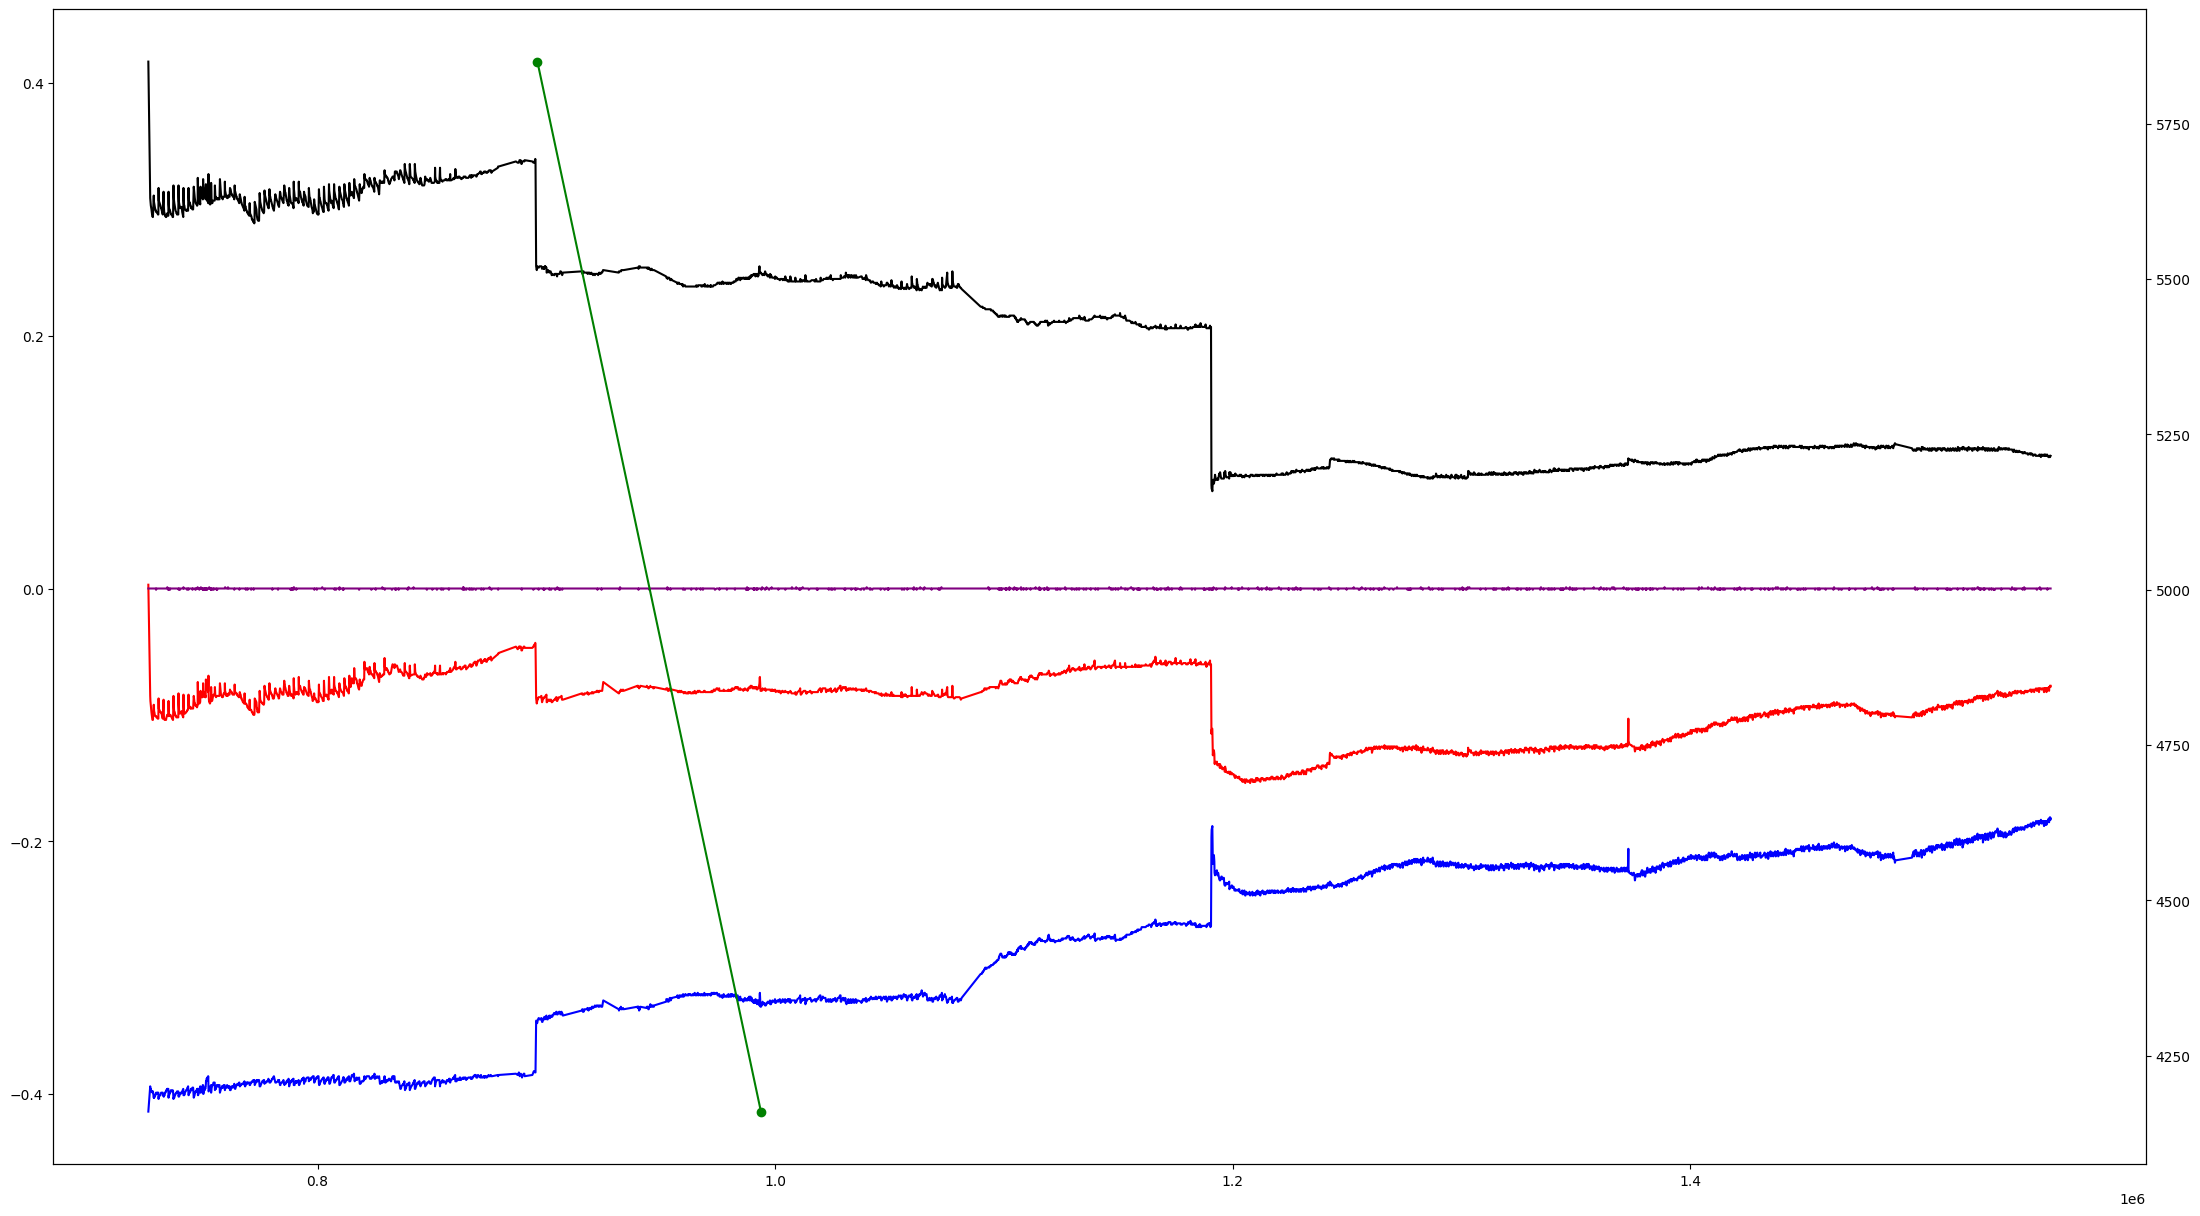

In [ ]:
def plot_x(df):
  fig,ax = plt.subplots(figsize=(27, 15))
  ax.plot(df['Anode #1'].index, df['Anode #1'].interpolate(), color = 'blue', label ='Power')
  ax.plot(df['Cathode #1'].index, df['Cathode #1'].interpolate(), color = 'red', label ='Power')
  ax.plot(df['Total V #1'].index, df['Total V #1'].interpolate(), color = 'black', label ='Total V #1')
  ax.plot(df['Current #1'].index, df['Current #1'].interpolate(), color = 'purple', label ='Total V #1')
  ax2 = ax.twinx()
  ax2.plot(df['CODcr(a) #1-out'].dropna().index, df['CODcr(a) Anode Tank'].dropna().values, marker='o', color = 'green', label ='Power')

plot_x(df_no_outliers)

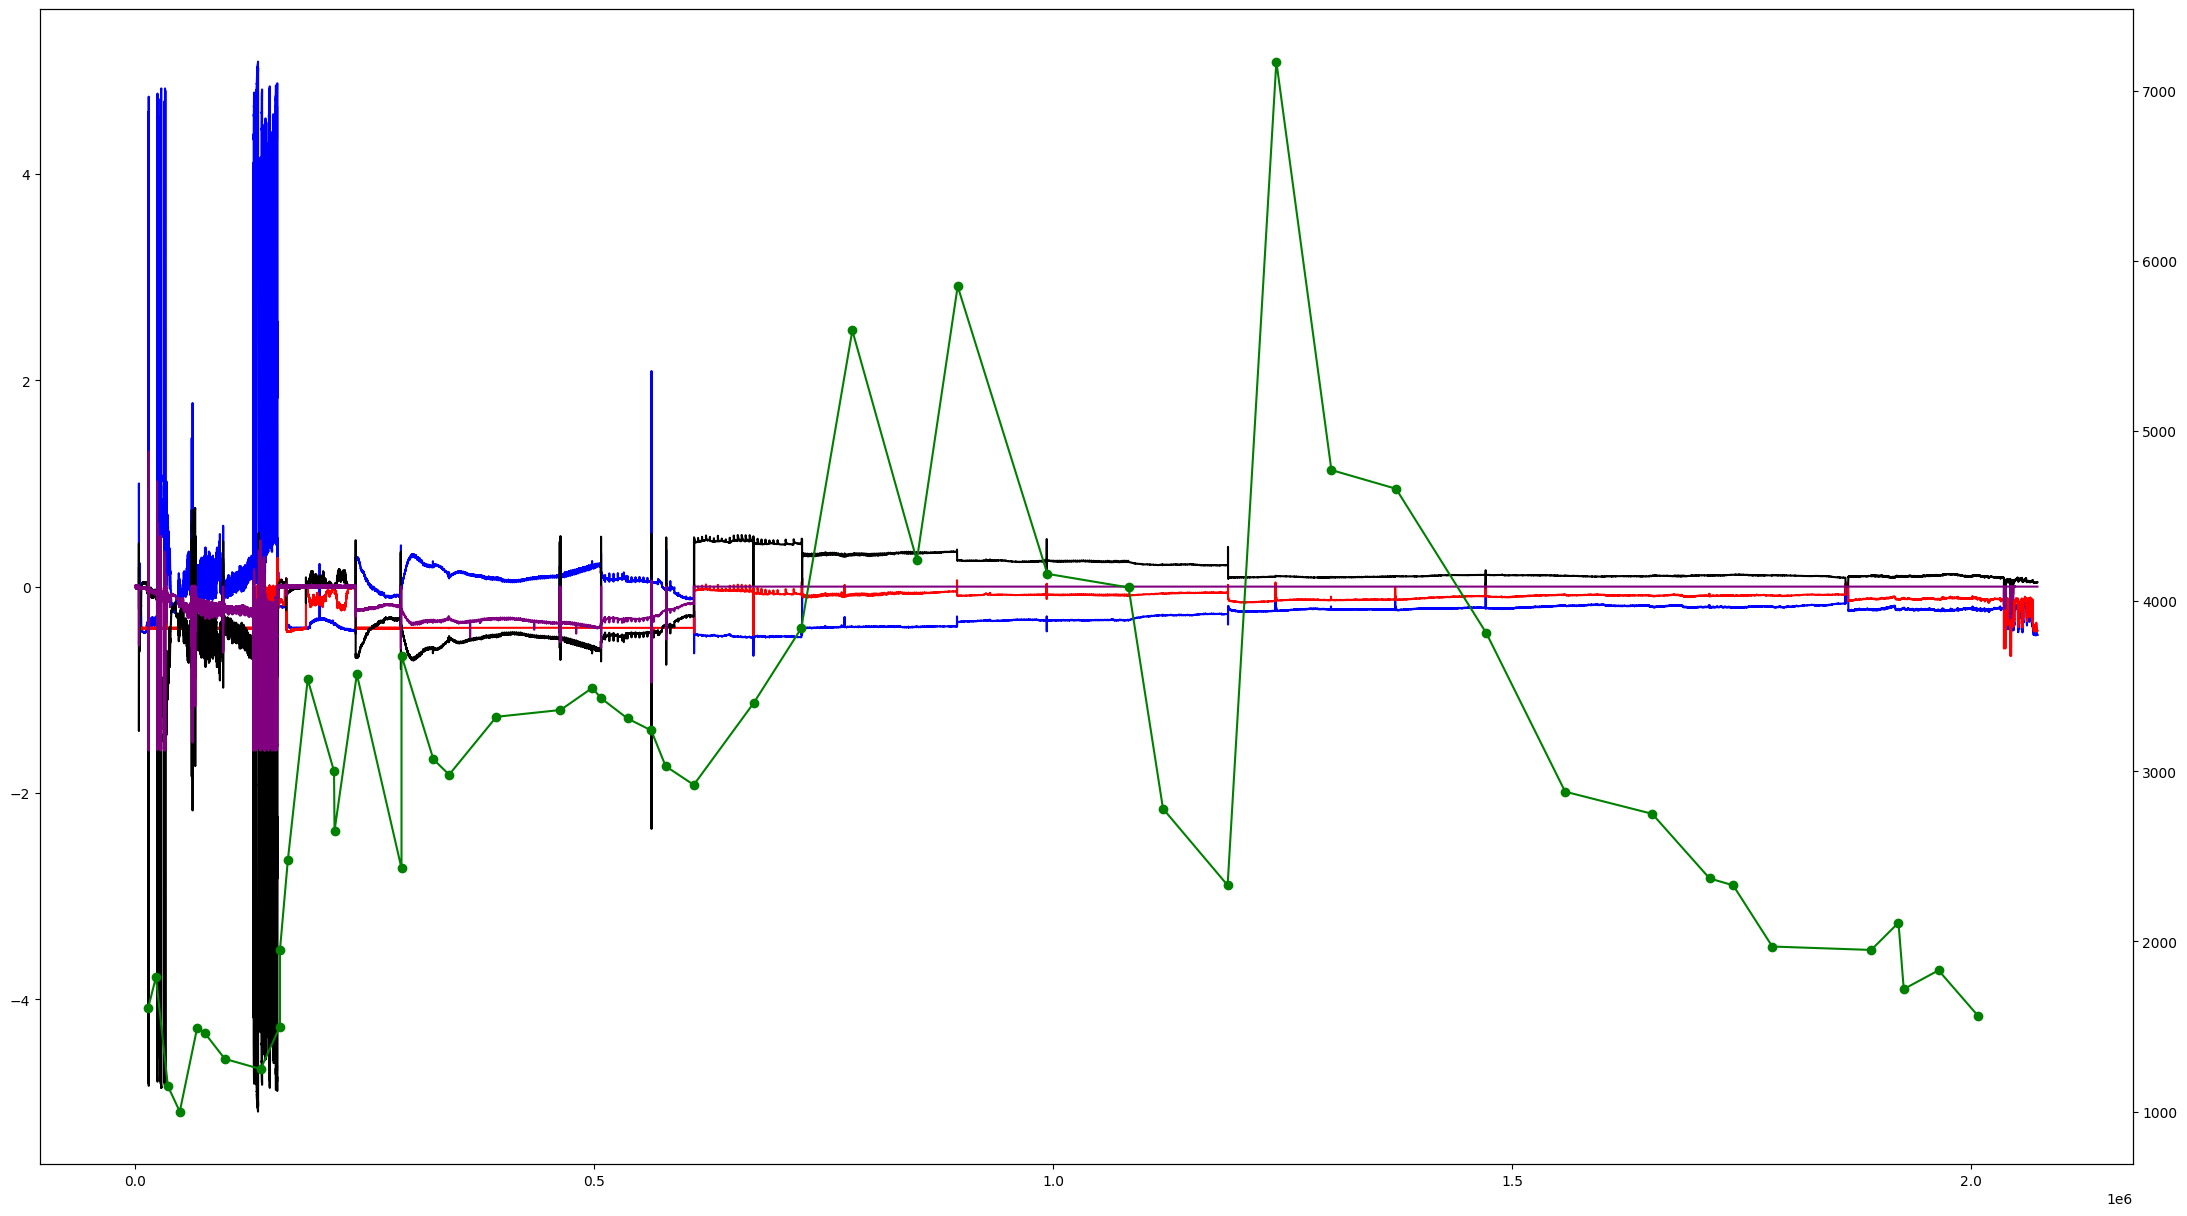

In [ ]:
fig,ax = plt.subplots(figsize=(27, 15))
ax.plot(df['Anode #1'].index, df['Anode #1'].interpolate(), color = 'blue', label ='Power')
ax.plot(df['Cathode #1'].index, df['Cathode #1'].interpolate(), color = 'red', label ='Power')
ax.plot(df['Total V #1'].index, df['Total V #1'].interpolate(), color = 'black', label ='Total V #1')
ax.plot(df['Current #1'].index, df['Current #1'].interpolate(), color = 'purple', label ='Total V #1')
ax2 = ax.twinx()
ax2.plot(df['CODcr(a) #1-out'].dropna().index, df['CODcr(a) Anode Tank'].dropna().values, marker='o', color = 'green', label ='Power')

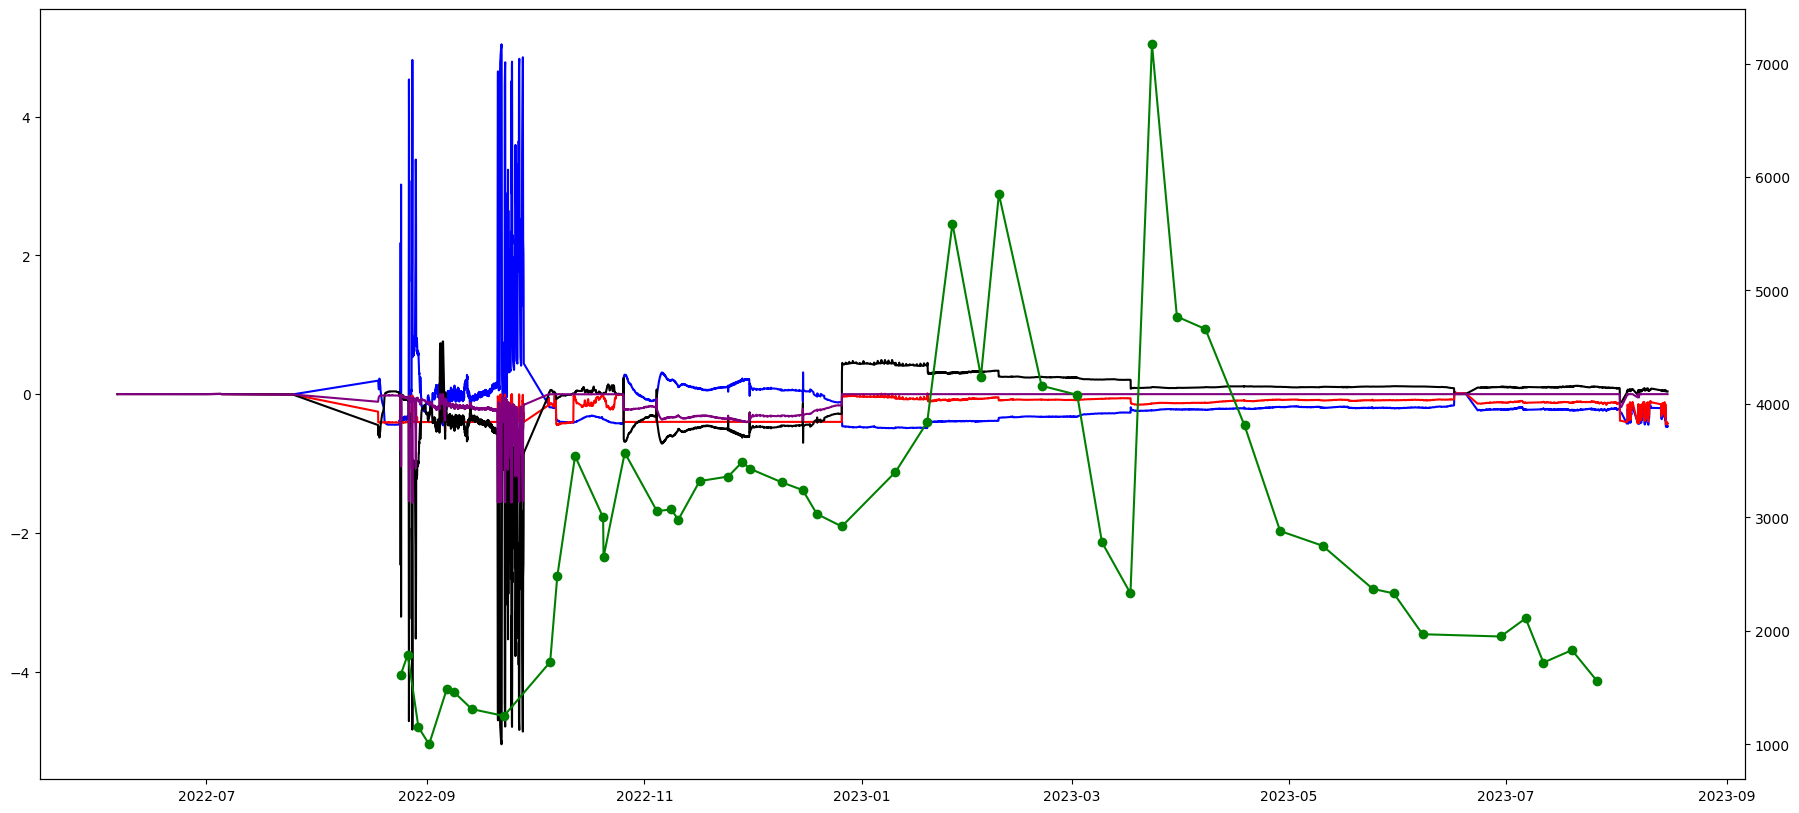

In [ ]:
fig,ax = plt.subplots(figsize=(22, 10))
ax.plot(df_h['Anode #1'].index, df_h['Anode #1'].interpolate(), color = 'blue', label ='Power')
ax.plot(df_h['Cathode #1'].index, df_h['Cathode #1'].interpolate(), color = 'red', label ='Power')
ax.plot(df_h['Total V #1'].index, df_h['Total V #1'].interpolate(), color = 'black', label ='Total V #1')
ax.plot(df_h['Current #1'].index, df_h['Current #1'].interpolate(), color = 'purple', label ='Total V #1')
ax2 = ax.twinx()
ax2.plot(df_h['CODcr(a) #1-out'].dropna().index, df_h['CODcr(a) Anode Tank'].dropna().values, marker='o', color = 'green', label ='Power')

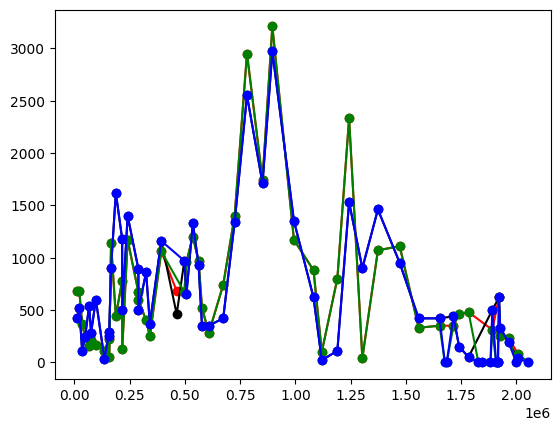

In [ ]:
plt.plot(df['CODcr(a) Anode Tank'].dropna().index, np.abs(df['CODcr(a) Anode Tank'].dropna().values - df['CODcr(a) #1-out'].dropna().values), color='red', label="CODcr(c) Cathode Tank", marker='o')
plt.plot(df['CODcr(a) Anode Tank'].dropna().index, np.abs(df['CODcr(a) Anode Tank'].dropna().values - df['CODcr(a) #2-out'].dropna().values), color='black', label="CODcr(c) Cathode Tank", marker='o')
plt.plot(df['COD removal concentration #1-out'].dropna().index, np.abs(df['COD removal concentration #1-out'].dropna().values), color='green', label="CODcr(c) #1-out,", marker='o')
plt.plot(df['COD removal concentration #2-out'].dropna().index, np.abs(df['COD removal concentration #2-out'].dropna().values), color='blue', label="CODcr(c) #1-out,", marker='o')

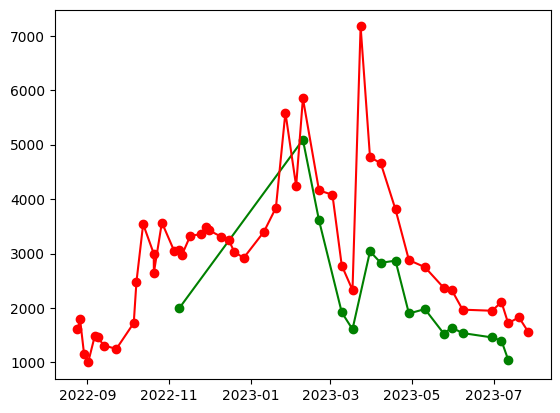

In [ ]:
plt.plot(df_h['CODcr(a)cent Anode Tank'].dropna().index, df_h['CODcr(a)cent Anode Tank'].dropna().values, color = 'green', label ='Power', marker='o')
plt.plot(df_h['CODcr(a) Anode Tank'].dropna().index, df_h['CODcr(a) Anode Tank'].dropna().values, color = 'red', label ='Power', marker='o')

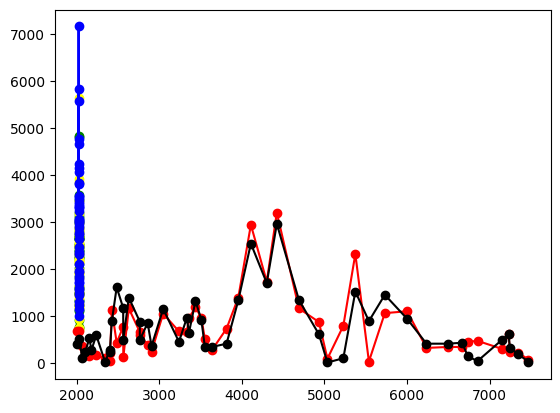

In [ ]:
plt.plot(df_h['CODcr(a) #1-out'].dropna().index, df_h['CODcr(a) #1-out'].dropna().values, color = 'green', label ='Power', marker='o')
plt.plot(df_h['CODcr(a) #2-out'].dropna().index, df_h['CODcr(a) #2-out'].dropna().values, marker='o', color = 'yellow', label ='Power')
plt.plot(df_h['CODcr(a) Anode Tank'].dropna().index, df_h['CODcr(a) Anode Tank'].dropna().values, marker='o', color = 'blue', label ='Power')
plt.plot(df['CODcr(a) Anode Tank'].dropna().index, np.abs(df['CODcr(a) Anode Tank'].dropna().values - df['CODcr(a) #1-out'].dropna().values), color='red', label="CODcr(c) Cathode Tank", marker='o')
plt.plot(df['CODcr(a) Anode Tank'].dropna().index, np.abs(df['CODcr(a) Anode Tank'].dropna().values - df['CODcr(a) #2-out'].dropna().values), color='black', label="CODcr(c) Cathode Tank", marker='o')

In [ ]:
|df.columns.to_list()

['DateTime',
 'Cathode #1',
 'Current #1',
 'Anode #1',
 'Total V #1',
 'Temp anode #1',
 'Cathode #2',
 'Current #2',
 'Anode #2',
 'Total V #2',
 'Temp anode #2',
 'Cathode pump #1',
 'Cathode pump #2',
 'Anode pump #1',
 'Anode pump#2',
 'sludge mixing pump',
 'Temp anode storage',
 'Cath tank float',
 'Anode tank float',
 'Power',
 'NO3-N_sensor_Temp',
 'NO3-N_sensor_Storage',
 'NO3-N_sensor_C1_out',
 'NO3-N_sensor_C2_out',
 'BES1 Cathode',
 'BES1 Current',
 'BES1 Anode',
 'BES1 Total',
 'BES1 Temp',
 'BES2 Cathode',
 'BES2 Current',
 'BES2 Anode',
 'BES2 Total',
 'BES2 Temp',
 'data logger',
 'pH(a) Anode Tank',
 'pH(a) #1-out',
 'pH(a) #2-out',
 'CODcr(a) Anode Tank',
 'CODcr(a) #1-out',
 'CODcr(a) #2-out',
 'CODcr(a)cent Anode Tank',
 'CODcr(a)cent #1-out',
 'CODcr(a)cent #2-out',
 'CODMn(a) Anode Tank',
 'CODMn(a) #1-out',
 'CODMn(a) #2-out',
 'BOD(a) Anode Tank',
 'BOD(a) #1-out',
 'BOD(a) #2-out',
 'PO4(a) Anode Tank',
 'PO4(a) #1-out',
 'PO4(a) #2-out',
 'NO2-N(a) Anode Tank

In [ ]:
# Вывод информации о каждом столбце
for col, count in df.count().iteritems():
    print(f"{col}: {count} непустых значений")

DateTime: 2072571 непустых значений
Cathode #1: 2070834 непустых значений
Current #1: 2070834 непустых значений
Anode #1: 2070834 непустых значений
Total V #1: 2070834 непустых значений
Temp anode #1: 2068266 непустых значений
Cathode #2: 2070834 непустых значений
Current #2: 2070834 непустых значений
Anode #2: 2070834 непустых значений
Total V #2: 2070834 непустых значений
Temp anode #2: 2070834 непустых значений
Cathode pump #1: 2070834 непустых значений
Cathode pump #2: 2070834 непустых значений
Anode pump #1: 2070834 непустых значений
Anode pump#2: 2070834 непустых значений
sludge mixing pump: 2070534 непустых значений
Temp anode storage: 2070404 непустых значений
Cath tank float: 2070534 непустых значений
Anode tank float: 2070534 непустых значений
Power: 2008795 непустых значений
NO3-N_sensor_Temp: 27388 непустых значений
NO3-N_sensor_Storage: 26050 непустых значений
NO3-N_sensor_C1_out: 27388 непустых значений
NO3-N_sensor_C2_out: 19243 непустых значений
BES1 Cathode: 54 непусты

<ipython-input-28-fe5c761f13db>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, count in df.count().iteritems():


{'whiskers': [<matplotlib.lines.Line2D at 0x7f13b12624d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f13b1261960>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f13b1263b80>],
 'medians': [<matplotlib.lines.Line2D at 0x7f13b1262740>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f13b1262ad0>],
 'means': []}

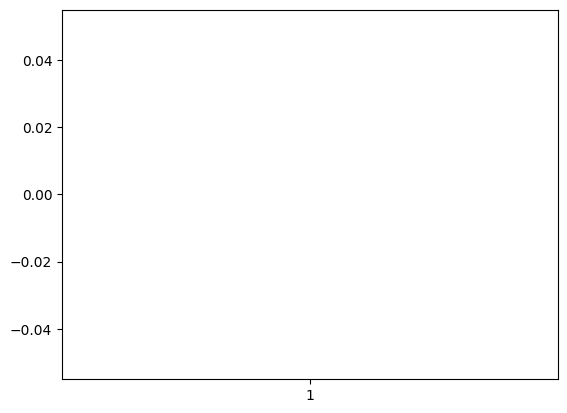

In [ ]:
plt.boxplot(df['Cathode #1'])

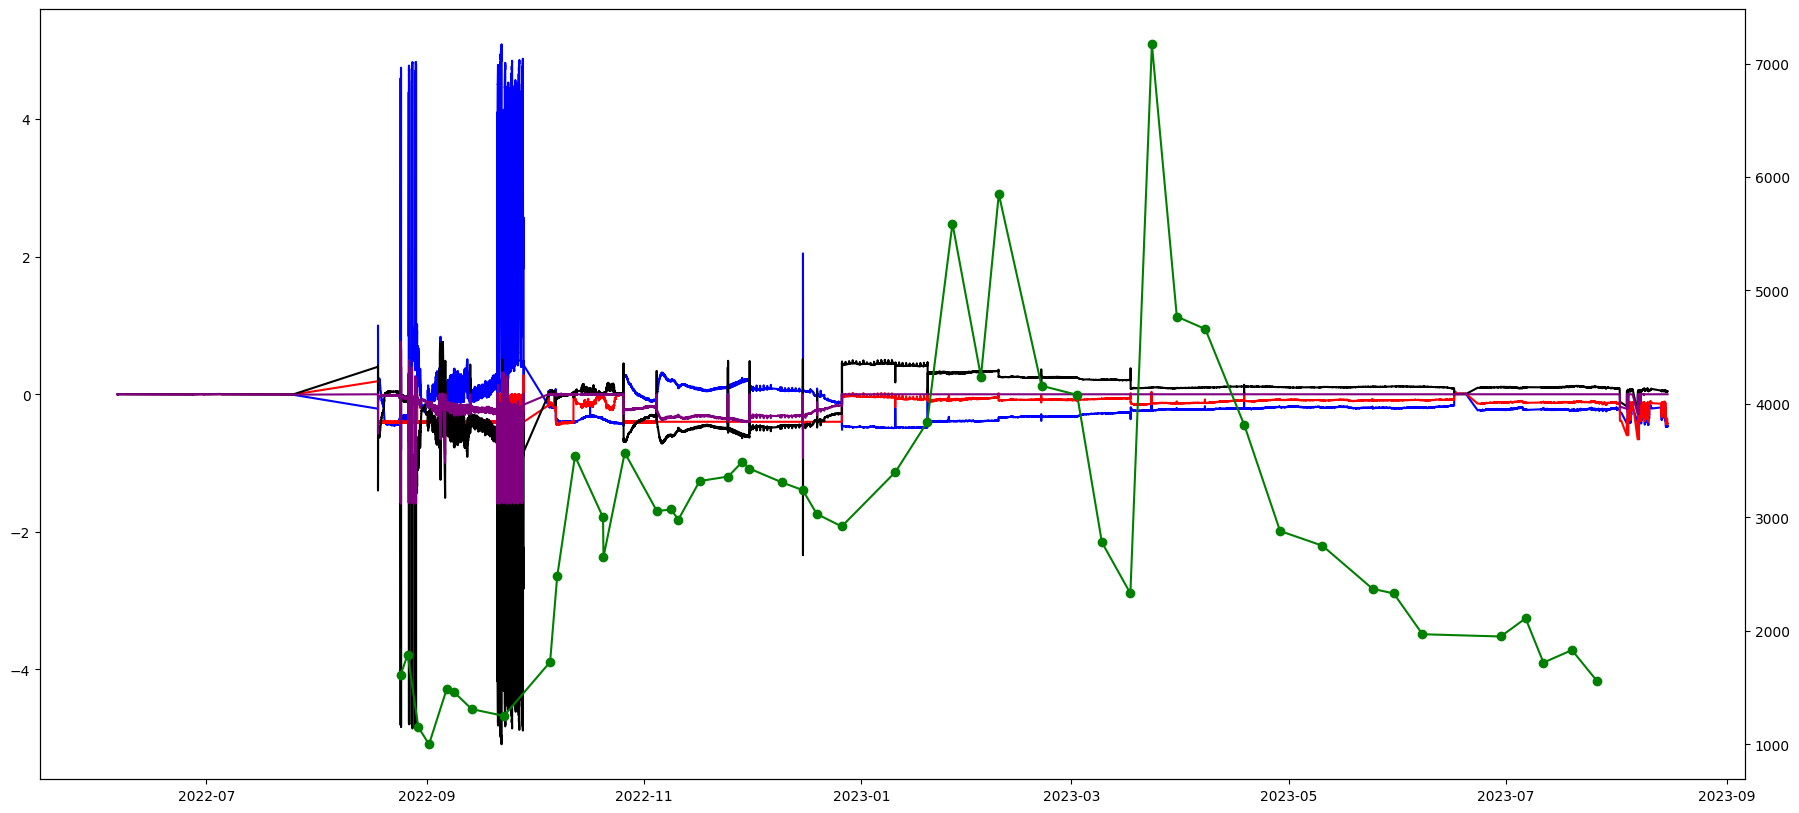

In [ ]:
fig,ax = plt.subplots(figsize=(22, 10))
ax.plot(df_min['Anode #1'].index, df_min['Anode #1'].interpolate(), color = 'blue', label ='Power')
ax.plot(df_min['Cathode #1'].index, df_min['Cathode #1'].interpolate(), color = 'red', label ='Power')
ax.plot(df_min['Total V #1'].index, df_min['Total V #1'].interpolate(), color = 'black', label ='Total V #1')
ax.plot(df_min['Current #1'].index, df_min['Current #1'].interpolate(), color = 'purple', label ='Total V #1')
ax2 = ax.twinx()
ax2.plot(df_min['CODcr(a) #1-out'].dropna().index, df_min['CODcr(a) Anode Tank'].dropna().values, marker='o', color = 'green', label ='Power')

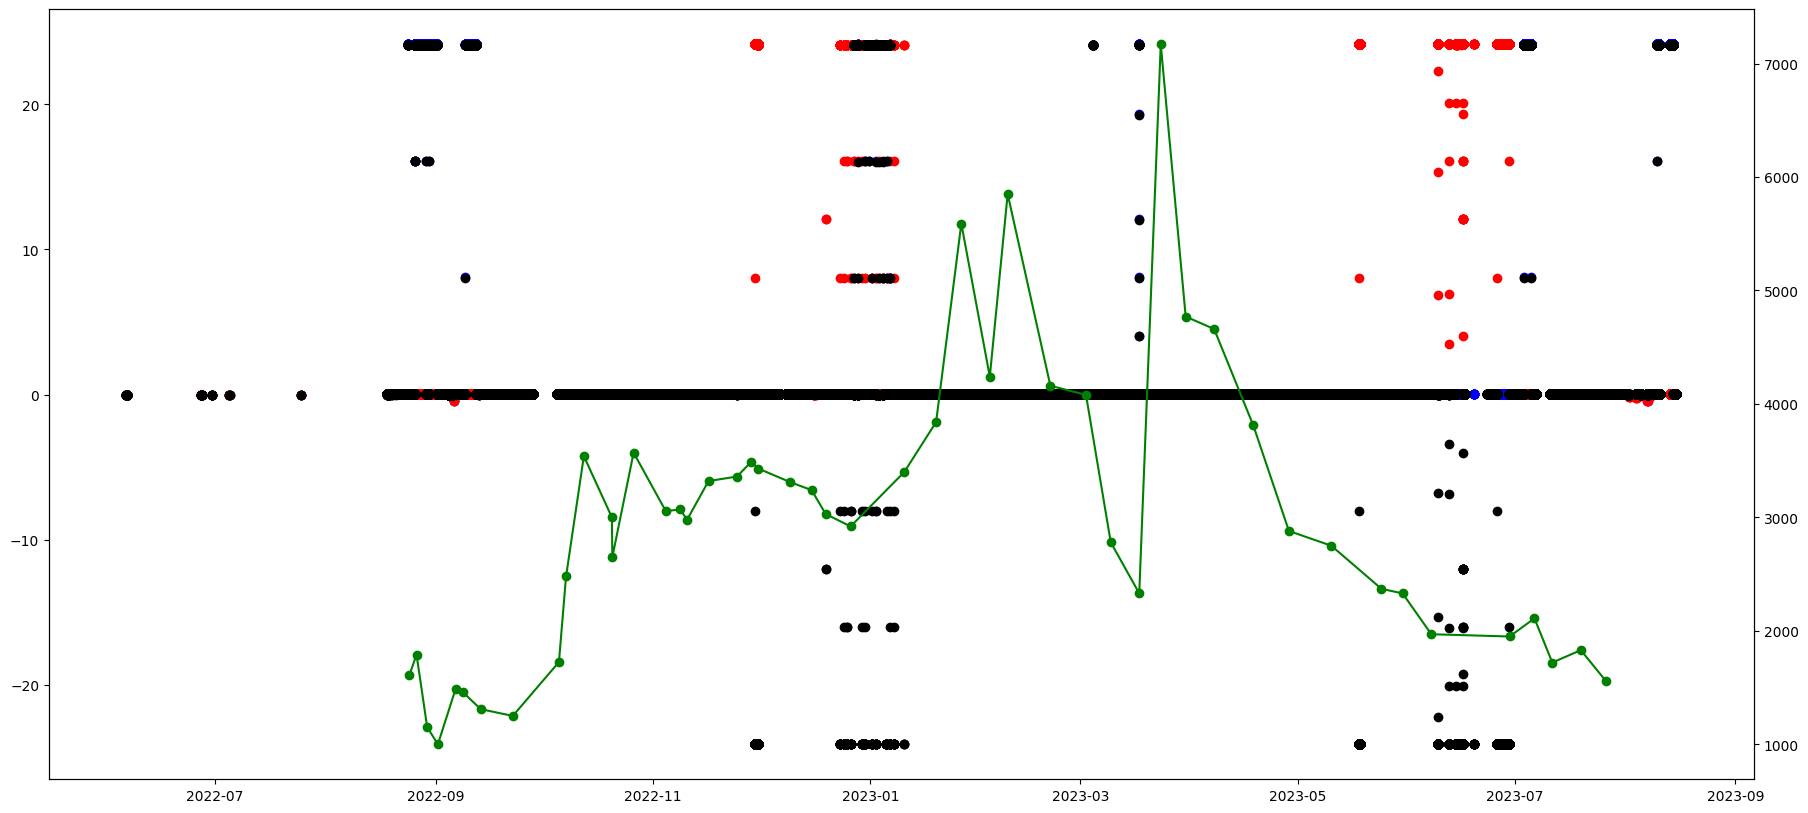

In [ ]:
fig,ax = plt.subplots(figsize=(22, 10))
ax.scatter(df_min['Anode tank float'].index, df_min['Anode tank float'], color = 'blue', label ='Power')
ax.scatter(df_min['Cath tank float'].index, df_min['Cath tank float'], color = 'red', label ='Power')
ax.scatter(df_min['Cath tank float'].index, df_min['Anode tank float'].values - df_min['Cath tank float'].values, color = 'black', label ='Power')
ax2 = ax.twinx()
ax2.plot(df_min['CODcr(a) #1-out'].dropna().index, df_min['CODcr(a) Anode Tank'].dropna().values, marker='o', color = 'green', label ='Power')

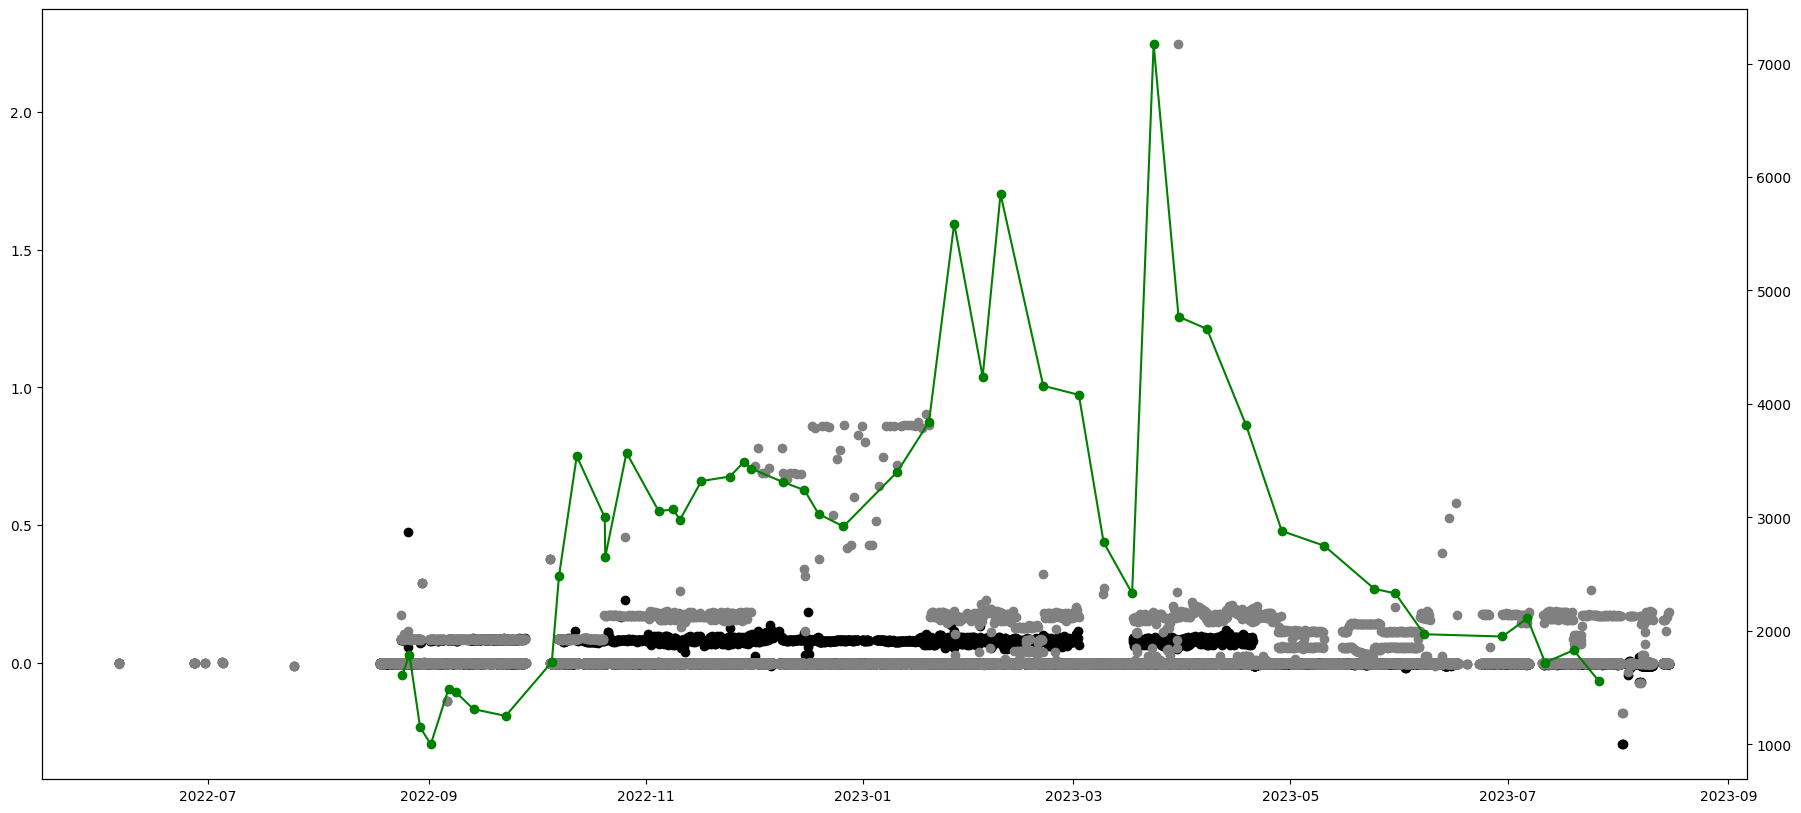

In [ ]:
fig,ax = plt.subplots(figsize=(22, 10))
ax.scatter(df_h['Anode pump #1'].index, df_h['Anode pump #1'], color = 'black', label ='Power')
ax.scatter(df_h['Cathode pump #1'].index, df_h['Cathode pump #1'], color = 'gray', label ='Power')
ax2 = ax.twinx()
ax2.plot(df_min['CODcr(a) #1-out'].dropna().index, df_min['CODcr(a) Anode Tank'].dropna().values, marker='o', color = 'green', label ='Power')

In [ ]:
pH(a) Anode Tank,

In [ ]:
df['pH(a) Anode Tank'].dropna().values

array([7.5, 7.5, 7.5, 7.5, 7.4, 7.4, 7.6, 7.7, 7.5, 7.6, 7.7, 7.3, 7.3,
       7.6, 7.9, 7.8, 7.2, 7.6, 7.4, 7.5, 7.5, 7.5, 7.5, 7.6, 7.2, 8. ,
       7.8, 7.3, 7.4, 7.3, 7.6, 7.4, 7.6, 7.6, 7.5, 7.7, 7.6, 7.6, 7.5,
       7.7, 7.7, 7.5, 7.7, 7.8, 7.7, 7.4, 7.5])

In [ ]:
df_min['pH(a) Anode Tank'].dropna().values

array([7.5 , 7.5 , 7.5 , 7.5 , 7.4 , 7.4 , 7.6 , 7.7 , 7.5 , 7.6 , 7.7 ,
       7.3 , 7.3 , 7.6 , 7.85, 7.2 , 7.6 , 7.4 , 7.5 , 7.5 , 7.5 , 7.5 ,
       7.6 , 7.2 , 8.  , 7.8 , 7.3 , 7.4 , 7.3 , 7.6 , 7.4 , 7.6 , 7.6 ,
       7.5 , 7.7 , 7.6 , 7.6 , 7.5 , 7.7 , 7.7 , 7.5 , 7.7 , 7.8 , 7.7 ,
       7.4 , 7.5 ])

In [ ]:
df['DateTime'][df_min['pH(a) Anode Tank'].dropna().index]

14119      2022/08/24 13:19:38
22632      2022/08/26 13:19:49
35592      2022/08/29 13:19:49
48552      2022/09/01 13:19:49
67397      2022/09/06 13:19:41
76037      2022/09/08 13:19:41
97610      2022/09/13 13:19:34
136654     2022/09/22 14:17:31
157702     2022/10/05 13:19:44
166341     2022/10/07 13:19:39
187941     2022/10/12 13:19:44
216620     2022/10/20 10:17:34
217160     2022/10/20 13:17:34
241480     2022/10/26 12:45:32
290131     2022/11/04 13:35:33
290132     2022/11/04 13:35:33
342042     2022/11/10 13:35:30
393543     2022/11/16 13:35:30
463355     2022/11/24 13:35:34
498063     2022/11/28 13:35:44
507352     2022/11/30 13:35:40
536432     2022/12/09 13:35:33
562249     2022/12/15 12:35:33
577878     2022/12/19 11:21:32
608565     2022/12/26 11:21:36
673724     2023/01/10 13:21:34
725632     2023/01/19 11:47:46
781326     2023/01/26 13:47:31
851599     2023/02/03 13:47:31
896102     2023/02/08 14:10:31
993802     2023/02/20 14:10:30
1082296    2023/03/02 14:10:31
1119811 

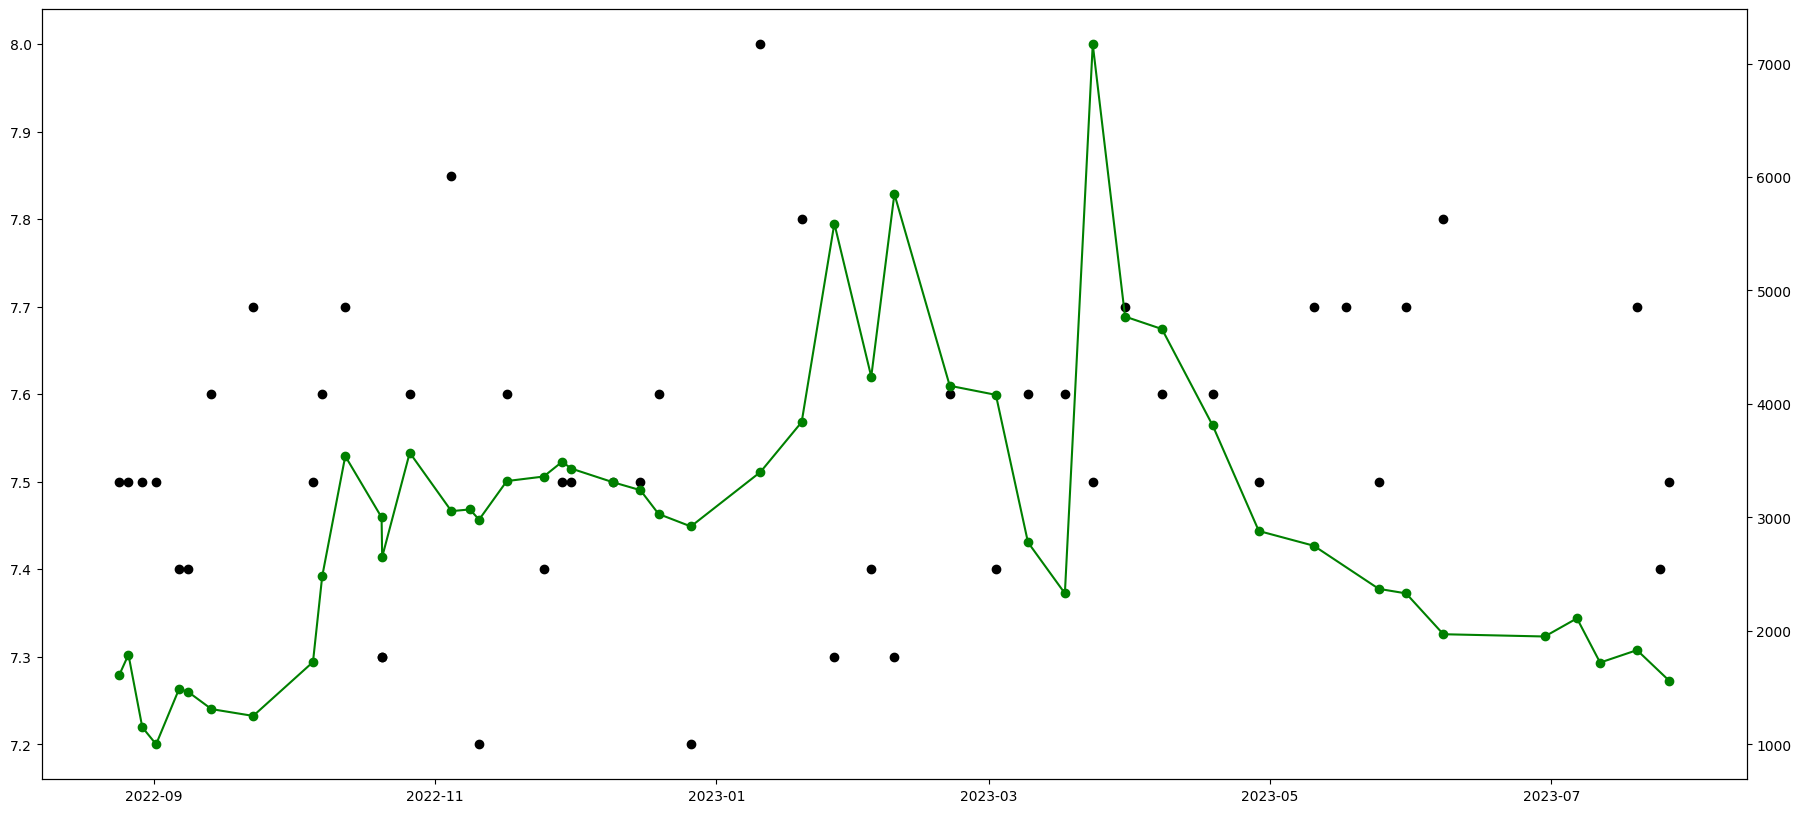

In [ ]:
fig,ax = plt.subplots(figsize=(22, 10))
ax.scatter(df_min['pH(a) Anode Tank'].index, df_min['pH(a) Anode Tank'], color = 'black', label ='Total V #1')
ax.plot(df_min['pH(a) Anode Tank'].index, df_min['pH(a) Anode Tank'], color = 'black', label ='Total V #1')
ax2 = ax.twinx()
ax2.plot(df_min['CODcr(a) #1-out'].dropna().index, df_min['CODcr(a) Anode Tank'].dropna().values, marker='o', color = 'green', label ='Power')

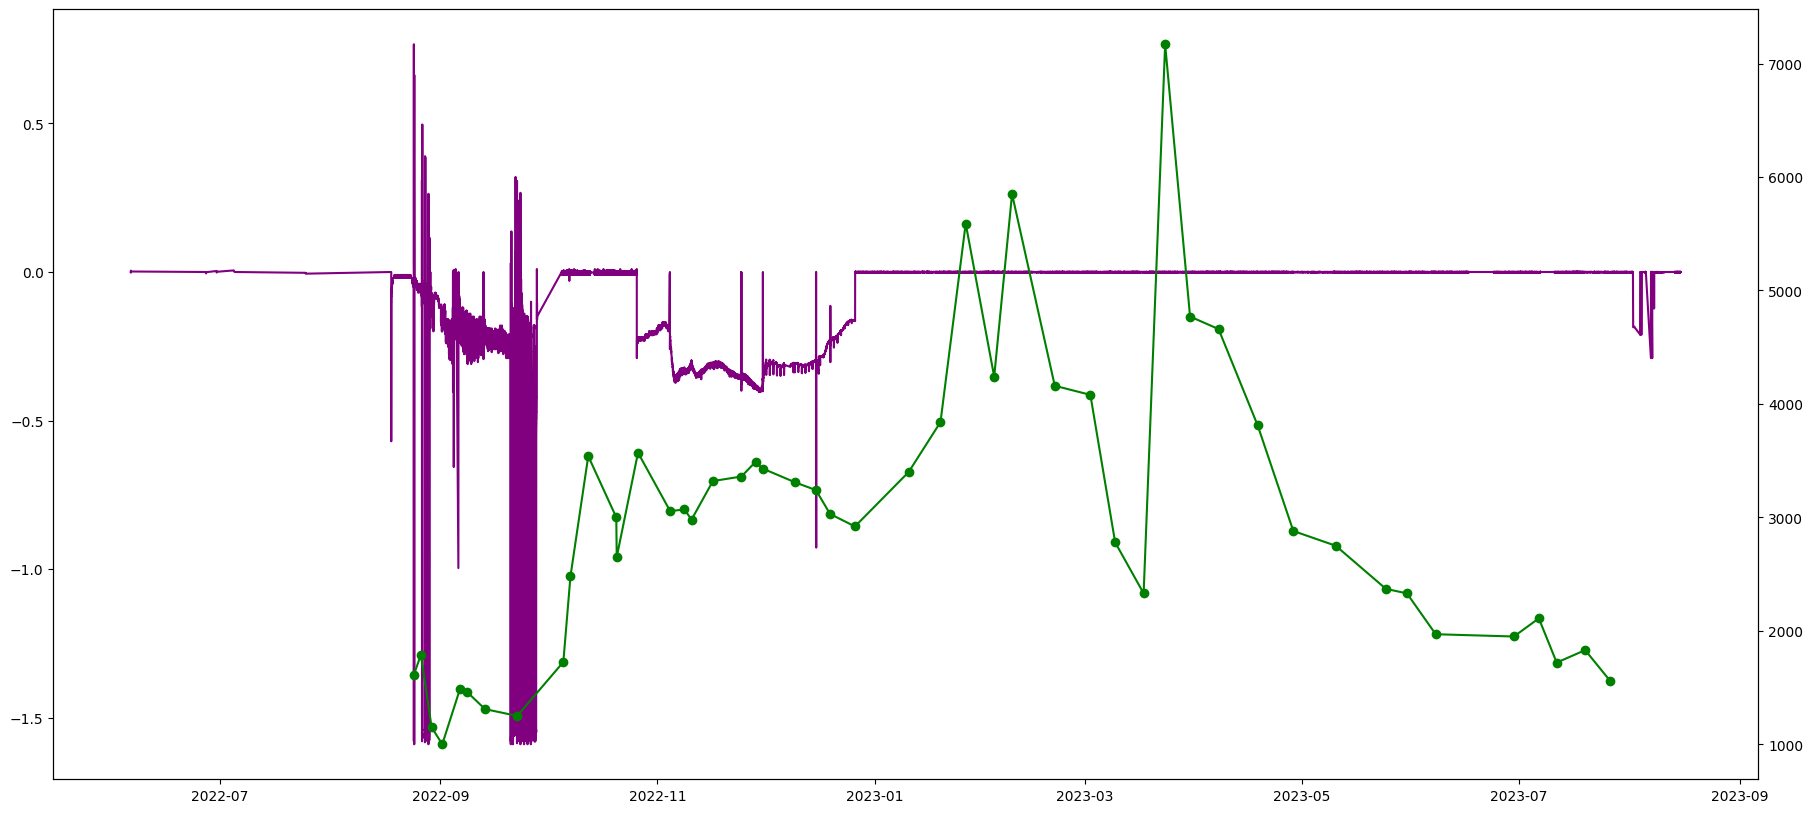

In [ ]:
fig,ax = plt.subplots(figsize=(22, 10))
ax.plot(df_min['Current #1'].index, df_min['Current #1'].interpolate(), color = 'purple', label ='Total V #1')
ax2 = ax.twinx()
ax2.plot(df_min['CODcr(a) #1-out'].dropna().index, df_min['CODcr(a) Anode Tank'].dropna().values, marker='o', color = 'green', label ='Power')

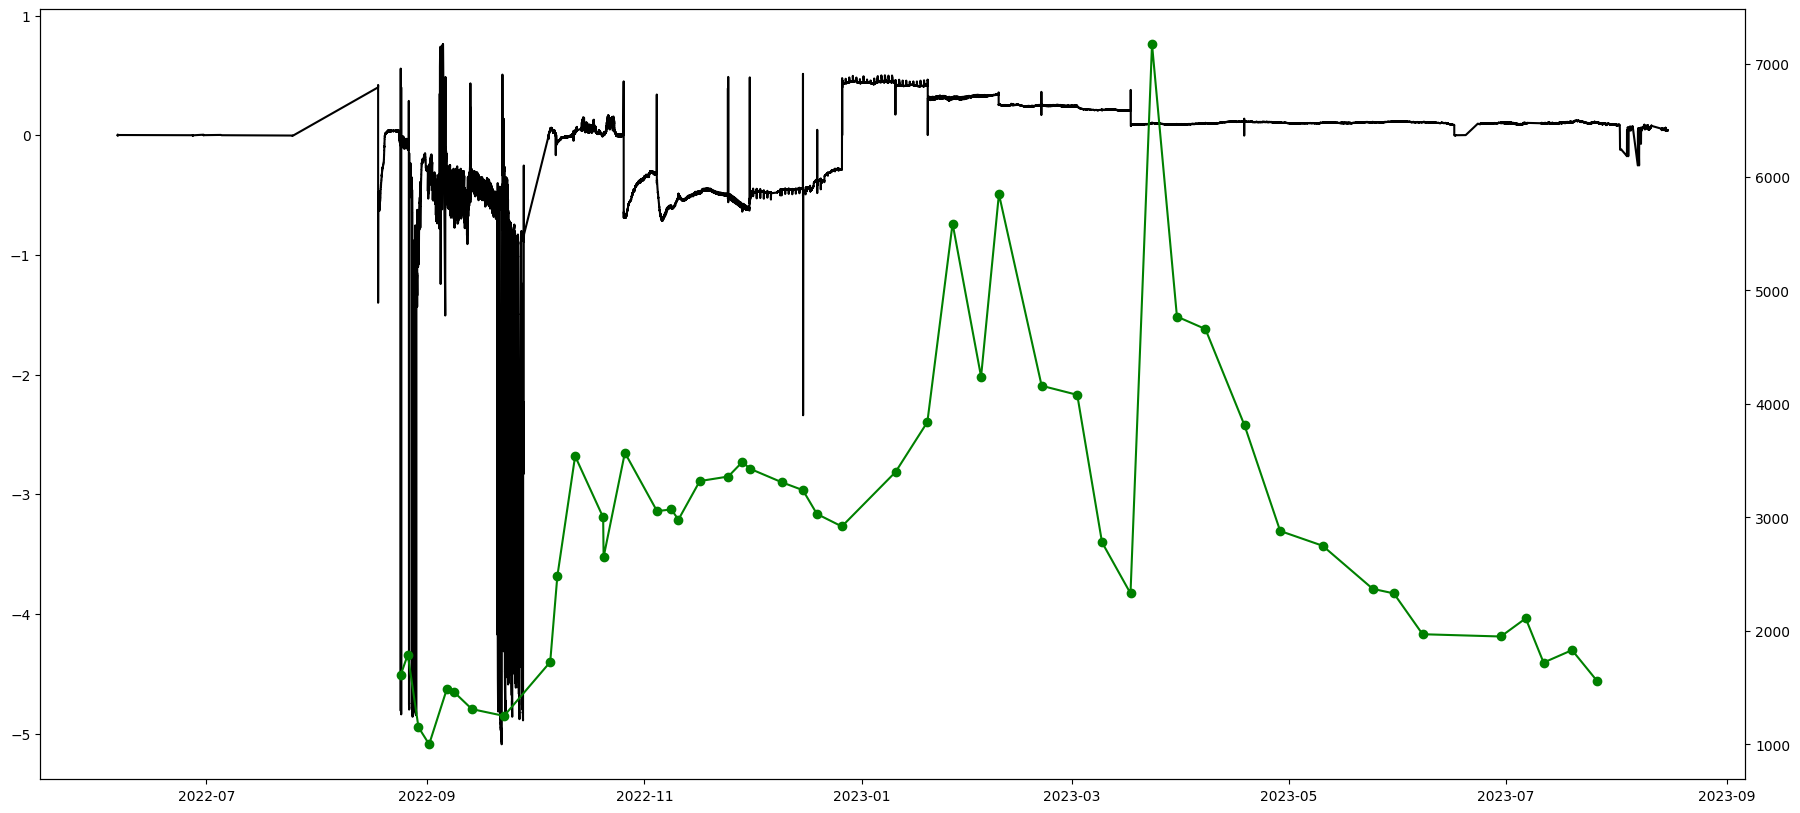

In [ ]:
fig,ax = plt.subplots(figsize=(22, 10))
ax.plot(df_min['Total V #1'].index, df_min['Total V #1'].interpolate(), color = 'black', label ='Total V #1')
ax2 = ax.twinx()
ax2.plot(df_min['CODcr(a) #1-out'].dropna().index, df_min['CODcr(a) Anode Tank'].dropna().values, marker='o', color = 'green', label ='Power')

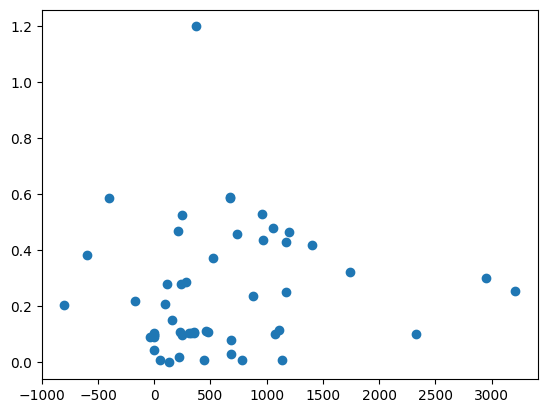

In [ ]:
plt.scatter(df['COD removal concentration #1-out'], df['BES1 Total'].abs())

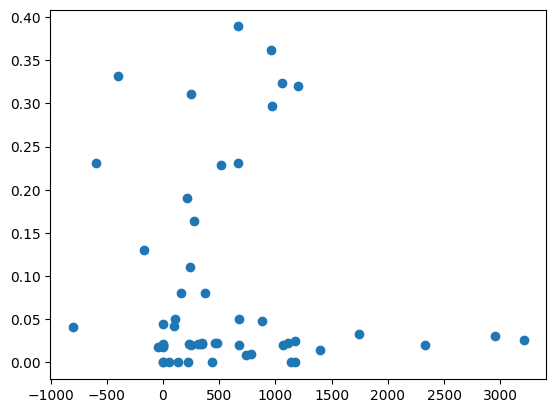

In [ ]:
plt.scatter(df['COD removal concentration #1-out'], df['BES1 Current'].abs())

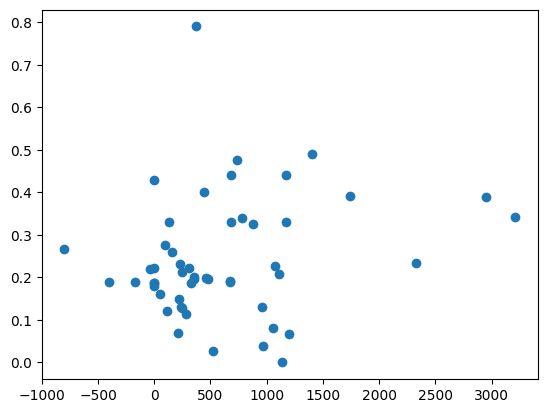

In [ ]:
plt.scatter(df['COD removal concentration #1-out'], df['BES1 Anode'].abs())

In [ ]:
df.columns

Index(['DateTime', 'Cathode #1', 'Current #1', 'Anode #1', 'Total V #1',
       'Temp anode #1', 'Cathode #2', 'Current #2', 'Anode #2', 'Total V #2',
       ...
       'COD removal percentage #1-out', 'COD removal percentage #2-out',
       'NO3 removal concentration #1-out', 'NO3 removal concentration #2-out',
       'NO3 removal percentage #1-out', 'NO3 removal percentage #2-out',
       'NO3 removal amount #1-out', 'NO3 removal amount #2-out',
       'Average temperature', 'timestamp'],
      dtype='object', length=103)

In [ ]:
df_h[['Cathode #1', 'Current #1', 'Anode #1', 'Total V #1',
       'Temp anode #1']].interpolate()

Cathode #1  Current #1  Anode #1  Total V #1  \
timestamp                                                           
2022-06-06 01:00:00    0.000543    0.000533  0.000578    0.000561   
2022-06-06 02:00:00    0.001189    0.001307  0.001565    0.001361   
2022-06-06 03:00:00    0.001186    0.001304  0.001561    0.001358   
2022-06-06 04:00:00    0.001183    0.001301  0.001557    0.001354   
2022-06-06 05:00:00    0.001180    0.001298  0.001554    0.001351   
...                         ...         ...       ...         ...   
2023-08-15 06:00:00   -0.435000   -0.000189 -0.472000    0.037000   
2023-08-15 07:00:00   -0.403189   -0.000085 -0.442984    0.039795   
2023-08-15 08:00:00   -0.427801   -0.000093 -0.467084    0.039283   
2023-08-15 09:00:00   -0.428843   -0.000157 -0.467708    0.038865   
2023-08-15 10:00:00   -0.427066   -0.000031 -0.466620    0.039555   

                     Temp anode #1  
timestamp                           
2022-06-06 01:00:00       0.000571  
2022-06-06 02:00:00       0.001432  
2022-06-06 03:00:00       0.003444  
2022-06-06 04:00:00       0.005455  
2022-06-06 05:00:00       0.007466  
...                            ...  
2023-08-15 06:00:00      28.344262  
2023-08-15 07:00:00      28.334153  
2023-08-15 08:00:00      28.362125  
2023-08-15 09:00:00      28.387568  
2023-08-15 10:00:00      28.419214  

[10450 rows x 5 columns]

In [ ]:
df_h['COD removal concentration #1-out'].interpolate().fillna(0)

False    8542
True     1908
Name: COD removal concentration #1-out, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df_h[['Cathode #1', 'Current #1', 'Anode #1', 'Total V #1',
       'Temp anode #1']].interpolate().fillna(0)
y = df_h['COD removal concentration #1-out'].interpolate().fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
y_pred

array([ 297.08196122,   61.465625  ,    0.        , ..., 1076.54634064,
       -133.22      ,  126.1607717 ])

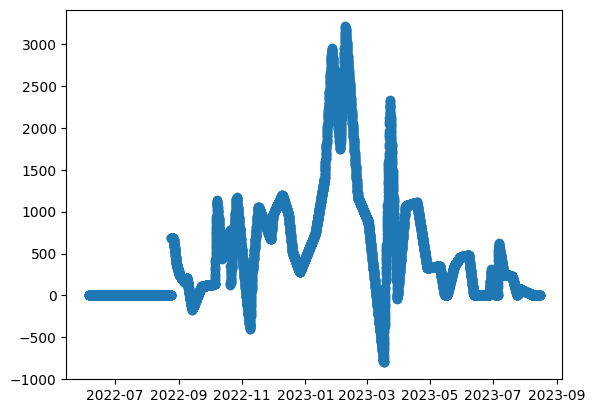

In [ ]:
plt.scatter(y_train.index, y_train)

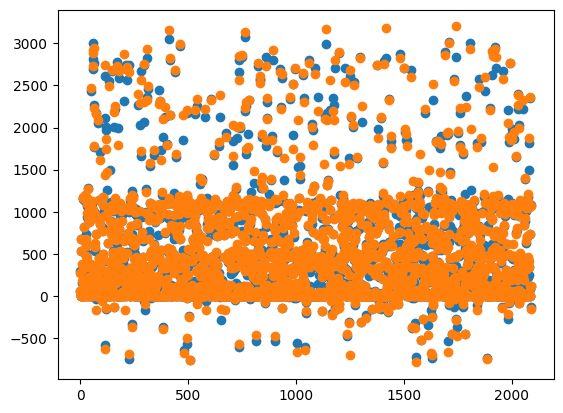

In [ ]:
plt.scatter([i for i in range(y_pred.size)], y_pred)
plt.scatter([i for i in range(y_test.size)], y_test)

In [ ]:
NO3-N_sensor_Storage NO3-N(c) Cathode Tank